In [1]:

# Utility

from shutil import copyfile
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

# Image processing
import cv2
from PIL import Image

# KDTree
from sklearn.neighbors import KDTree
import joblib

# Keras
from tensorflow import keras
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications import mobilenet_v2, resnet

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
from fastai.vision import *
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

In [2]:
import pandas as pd
import random
# Keras modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import SGD
from keras.layers import BatchNormalization, Dropout, Dense
from keras.optimizers import Adam

# KDTree creation and saving
from sklearn.neighbors import KDTree
import joblib

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

import pickle
from pathlib import Path
from scipy.linalg import fractional_matrix_power
import scipy.misc
import cv2
import os.path
import glob
import argparse
import seaborn as sns
from google.colab import drive
from zipfile import ZipFile
from time import time
from shutil import copyfile
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from google.colab import drive
import requests
import shutil

# Mount Google Drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [5]:
import multiprocessing as mp

num_processes = 6
pool = mp.Pool(processes=num_processes)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [6]:
    import tarfile


    # Define the URL of the file you want to download
    file_url = "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"

    # Send a GET request to the URL
    r = requests.get(file_url, stream=True)

    # Specify the path in Google Drive where you want to save the file
    save_path = "/content/gdrive/My Drive/food101.tar.gz"

    # Open a new file in Google Drive and write the content of 'r' to it
    with open(save_path, 'wb') as f:
        shutil.copyfileobj(r.raw, f)

    # Close the request
    r.close()

    # Print a message indicating that the file has been saved
    print("File saved to Google Drive:", save_path)


File saved to Google Drive: /content/gdrive/My Drive/food101.tar.gz


In [7]:
# Open the tar.gz archive
with tarfile.open('/content/gdrive/My Drive/food101.tar.gz', 'r:gz') as archive:
    # Extract all the contents into the directory
    archive.extractall()


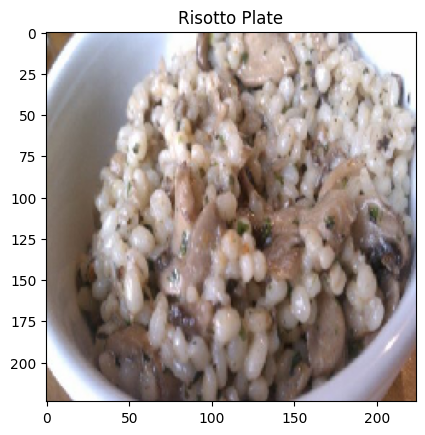

In [6]:
img = kimage.load_img('/content/food-101/images/risotto/1508678.jpg', target_size=(224, 224))

plt.imshow(img)
plt.title('Risotto Plate')
plt.show()

Mislabelled Images

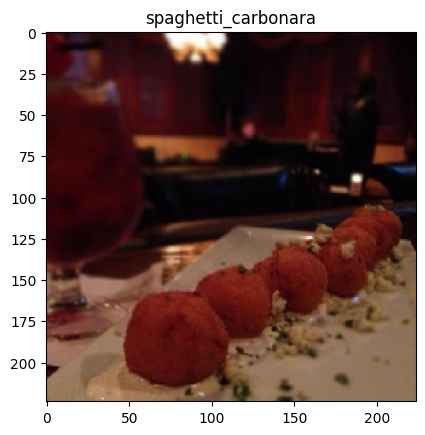

In [ ]:
img = kimage.load_img('/content/food-101/images/chicken_wings/3826446.jpg', target_size=(224, 224))

plt.imshow(img)
plt.title('spaghetti_carbonara')
plt.show()

In [8]:
image_dir = Path('/content/food-101/images/')

In [9]:


# Create an empty list to store labels and file paths
data = []

# Walk through the directory structure
for root, dirs, files in os.walk(image_dir):
    # Extract the label from the directory name
    label = os.path.basename(root)
    # Iterate over files in the current directory
    for file in files:
        # Construct the file path
        file_path = os.path.join(root, file)
        # Append label and file path to the data list
        data.append((file_path, label))

# Convert the data list to a DataFrame
images = pd.DataFrame(data, columns=['Filepath', 'Label'])

images

Filepath             Label
0       /content/food-101/images/french_toast/2674544.jpg      french_toast
1       /content/food-101/images/french_toast/3137760.jpg      french_toast
2       /content/food-101/images/french_toast/1325896.jpg      french_toast
3       /content/food-101/images/french_toast/1993580.jpg      french_toast
4        /content/food-101/images/french_toast/458528.jpg      french_toast
...                                                   ...               ...
100995  /content/food-101/images/shrimp_and_grits/3259...  shrimp_and_grits
100996  /content/food-101/images/shrimp_and_grits/8466...  shrimp_and_grits
100997  /content/food-101/images/shrimp_and_grits/1164...  shrimp_and_grits
100998  /content/food-101/images/shrimp_and_grits/1530...  shrimp_and_grits
100999  /content/food-101/images/shrimp_and_grits/3195...  shrimp_and_grits

[101000 rows x 2 columns]

In [10]:
subplot = pd.DataFrame()

paths=[]

labels= []

for i in range(len(images)):
  name = images.iloc[i]['Label']
  if name not in labels:
    paths.append(images.iloc[i]['Filepath'])
    labels.append(name)

subplot['paths'] = paths
subplot['labels'] = labels

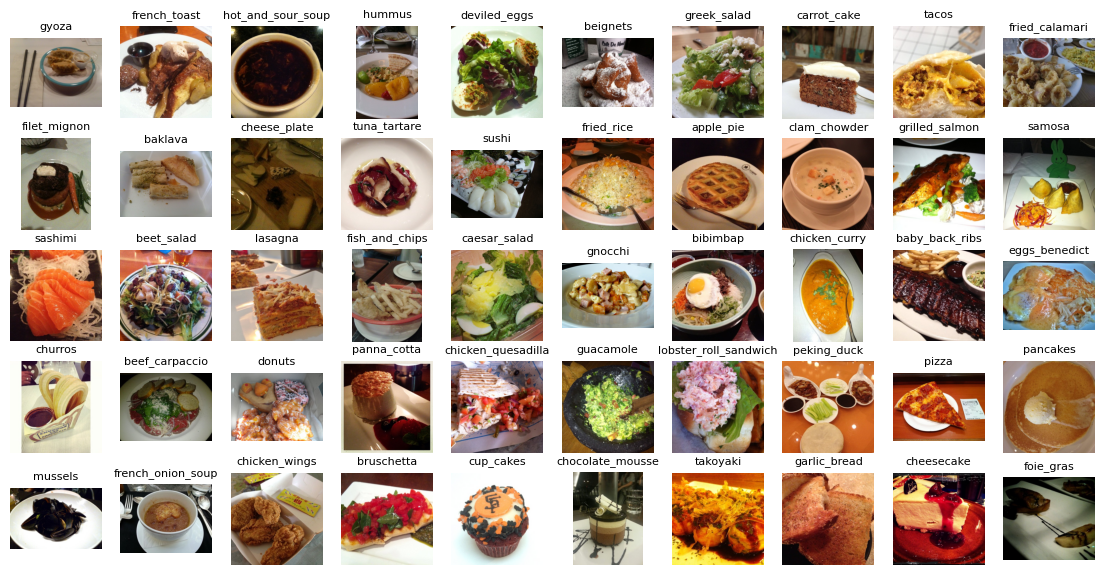

In [12]:

plt.figure(figsize=(14,7))
for i in range(50):
  plt.subplot(5, 10, 1 + i)
  # turn off axis
  plt.axis('off')
  # plot raw pixel data
  image = io.imread(subplot.iloc[i]['paths'])
  plt.imshow(image)
  plt.title(subplot.iloc[i]['labels'], fontsize=8)
plt.show()


Splitting the dataset into train/test

In [11]:
train_df, test_df = train_test_split(images, train_size=0.7, shuffle=True, random_state=1, stratify= images['Label'])


In [14]:
train_df.Label.unique()

array(['fried_rice', 'gnocchi', 'french_fries', 'chicken_curry',
       'falafel', 'bruschetta', 'grilled_salmon', 'spaghetti_bolognese',
       'pho', 'steak', 'huevos_rancheros', 'nachos', 'chicken_wings',
       'macaroni_and_cheese', 'hot_dog', 'eggs_benedict',
       'strawberry_shortcake', 'tacos', 'poutine', 'lasagna', 'guacamole',
       'pizza', 'frozen_yogurt', 'chocolate_cake', 'cannoli',
       'breakfast_burrito', 'miso_soup', 'seaweed_salad', 'omelette',
       'ramen', 'beef_tartare', 'tiramisu', 'fish_and_chips', 'pad_thai',
       'macarons', 'chicken_quesadilla', 'club_sandwich',
       'shrimp_and_grits', 'hamburger', 'grilled_cheese_sandwich',
       'bibimbap', 'oysters', 'cup_cakes', 'crab_cakes', 'apple_pie',
       'beignets', 'sushi', 'deviled_eggs', 'hummus', 'carrot_cake',
       'escargots', 'waffles', 'foie_gras', 'garlic_bread', 'beet_salad',
       'french_onion_soup', 'cheesecake', 'lobster_roll_sandwich',
       'beef_carpaccio', 'clam_chowder', 'fried_

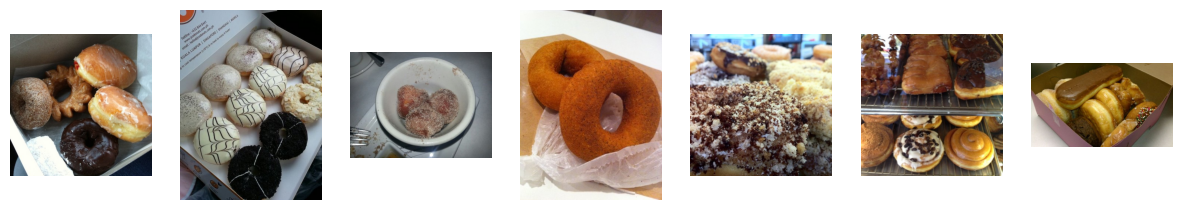

In [12]:
plt.figure(figsize=(15,3))
for i,path in enumerate(train_df[train_df.Label == 'donuts']['Filepath'][7:14]):
  plt.subplot(1,7, 1+i)
  # turn off axis
  plt.axis('off')
  # plot raw pixel data
  image = io.imread(path)
  plt.imshow(image)

plt.show()

In [13]:
sample = ['french_fries', 'tacos', 'waffles', 'sushi', 'lasagna','cup_cakes', 'gnocchi', 'falafel', 'pizza', 'hamburger']
#sample = ['oysters', 'lasagna', 'paella', 'sushi', 'risotto']

In [14]:
strain = train_df.loc[images['Filepath'].apply(lambda x: True if any(elem in x for elem in sample) else False)]
stest = test_df.loc[images['Filepath'].apply(lambda x: True if any(elem in x for elem in sample) else False)]


In [18]:
strain.head()



Filepath         Label
25019         /content/food-101/images/gnocchi/361811.jpg       gnocchi
92791   /content/food-101/images/french_fries/2624207.jpg  french_fries
100404       /content/food-101/images/falafel/3745890.jpg       falafel
8710           /content/food-101/images/tacos/3248495.jpg         tacos
22575         /content/food-101/images/lasagna/522031.jpg       lasagna

In [15]:


#set parameters
num_classes = 10
height = 224
width = 224
channels = 3
batch_size = 64
img_shape = (height, width, channels)
img_size = (height, width)

In [42]:
image_dir

PosixPath('/content/food-101/images')

In [16]:
#rescale 1./255 from [0,255] to [0,1]
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_images = train_generator.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=stest,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 5600 validated image filenames belonging to 10 classes.
Found 1400 validated image filenames belonging to 10 classes.
Found 3000 validated image filenames belonging to 10 classes.


In [67]:

# Architecture definition (v1)
inputs = keras.Input((224,224,3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding='same')(x)

x = keras.layers.Conv2D(64, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
net = keras.Model(inputs, outputs)


In [68]:

net.compile(optimizer = Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [69]:

# Model training
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = net.fit(train_images,
          epochs=30,
          validation_data=val_images,
          callbacks = [callback],
          verbose = 1);

Epoch 1/30
88/88 [==============================] - 26s 242ms/step - loss: 2.2914 - accuracy: 0.1289 - val_loss: 2.2720 - val_accuracy: 0.1636
Epoch 2/30
88/88 [==============================] - 20s 231ms/step - loss: 2.2435 - accuracy: 0.1704 - val_loss: 2.2141 - val_accuracy: 0.1964
Epoch 3/30
88/88 [==============================] - 20s 230ms/step - loss: 2.1716 - accuracy: 0.2207 - val_loss: 2.1442 - val_accuracy: 0.2400
Epoch 4/30
88/88 [==============================] - 20s 227ms/step - loss: 2.1041 - accuracy: 0.2525 - val_loss: 2.1045 - val_accuracy: 0.2257
Epoch 5/30
88/88 [==============================] - 20s 228ms/step - loss: 2.0350 - accuracy: 0.2823 - val_loss: 2.0509 - val_accuracy: 0.2679
Epoch 6/30
88/88 [==============================] - 20s 230ms/step - loss: 1.9788 - accuracy: 0.2948 - val_loss: 1.9960 - val_accuracy: 0.2921
Epoch 7/30
88/88 [==============================] - 20s 226ms/step - loss: 1.9299 - accuracy: 0.3223 - val_loss: 1.9870 - val_accuracy: 0.2929

Text(0.5, 0.98, 'Net from scratch - 5 classes')

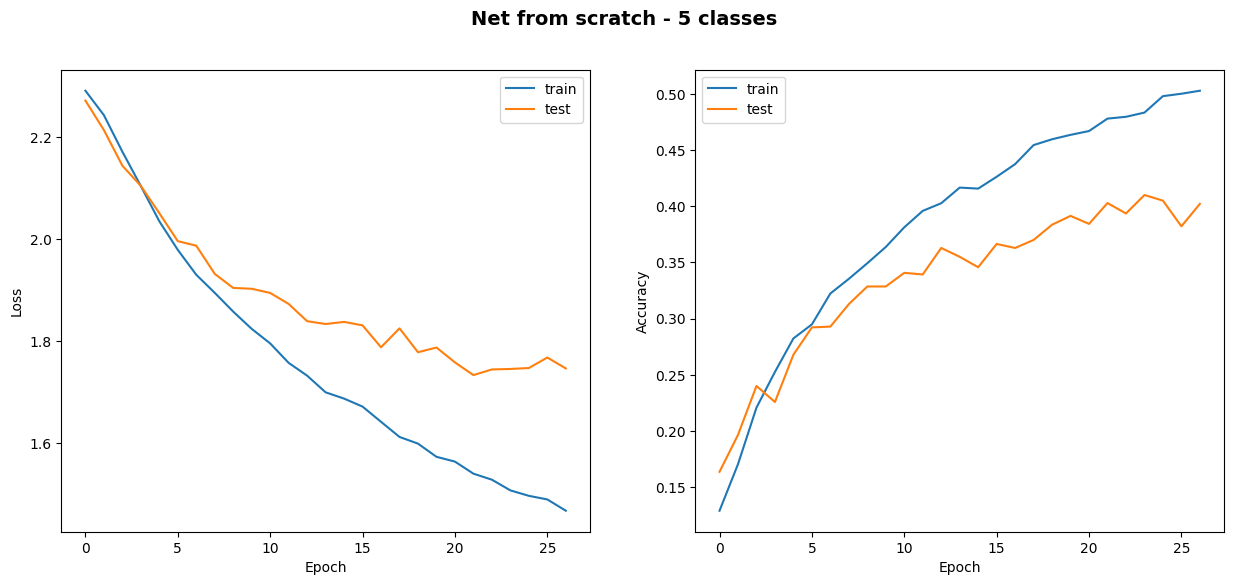

In [70]:
# Visualization of the learning curves
# Loss
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.suptitle("Net from scratch - 5 classes", fontsize=14, fontweight='bold')

In [71]:
class_probs = net.predict(test_images)

top1 = 0.0

for i, l in enumerate(test_images.labels):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:3]
    if top_values[0] == l:
        top1 += 1.0

print("top1 acc", top1/len(test_images.labels))

47/47 [==============================] - 9s 180ms/step
top1 acc 0.414


In [72]:

#classification report

predictions = np.argmax(class_probs, axis=1)
cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

print("Classification Report:\n----------------------\n", clr)


Classification Report:
----------------------
               precision    recall  f1-score   support

   cup_cakes       0.52      0.57      0.54       300
     falafel       0.32      0.31      0.32       300
french_fries       0.60      0.56      0.58       300
     gnocchi       0.35      0.37      0.36       300
   hamburger       0.51      0.20      0.28       300
     lasagna       0.45      0.30      0.36       300
       pizza       0.36      0.57      0.44       300
       sushi       0.57      0.40      0.47       300
       tacos       0.29      0.52      0.37       300
     waffles       0.42      0.34      0.38       300

    accuracy                           0.41      3000
   macro avg       0.44      0.41      0.41      3000
weighted avg       0.44      0.41      0.41      3000



## Data Augmentation

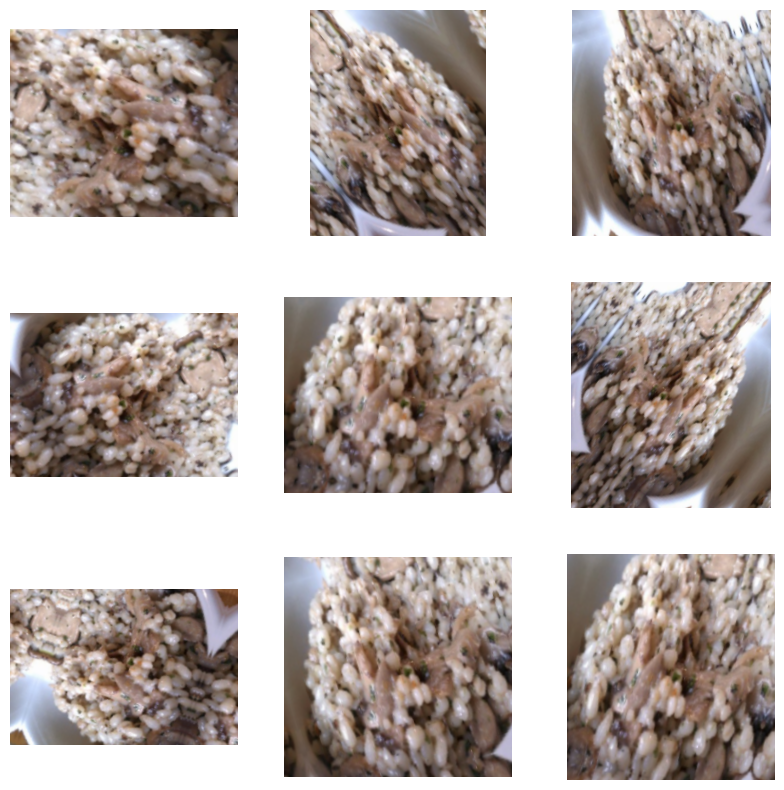

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np

# Load a sample image
sample_image_path = '/content/food-101/images/risotto/1508678.jpg'
img = image.load_img(sample_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Define the data augmentation layer
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
], name="data_augmentation")

# Apply data augmentation and plot results
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(img_array, training=True)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_image[0]))
    plt.axis("off")

plt.show()


In [28]:

train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect',validation_split=0.2)
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)



Found 5600 validated image filenames belonging to 10 classes.
Found 1400 validated image filenames belonging to 10 classes.
Found 3000 validated image filenames belonging to 10 classes.


In [32]:
# Create a sample of training images for fitting the generator
sample_data = []
for img_path in strain['Filepath']:
    img = kimage.load_img(img_path, target_size=(224, 224))
    img_array = kimage.img_to_array(img)
    sample_data.append(img_array)

# Convert to numpy array
sample_data = np.array(sample_data)

# Fit the train_generator on sample data
train_generator.fit(sample_data)

In [33]:
train_images = train_generator.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=stest,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 5600 validated image filenames belonging to 10 classes.
Found 1400 validated image filenames belonging to 10 classes.
Found 3000 validated image filenames belonging to 10 classes.


### NN from scratch

In [34]:

# Architecture definition (v1)
inputs = keras.Input((224,224,3))

x = inputs
# x = data_augmentation(inputs)
x = keras.layers.Conv2D(32, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding='same')(x)

x = keras.layers.Conv2D(64, 3, padding='same')(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
net = keras.Model(inputs, outputs)






In [30]:
net.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 activation_2 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 activation_3 (Activation)   (None, 75, 75, 64)        0         
                                                           

In [ ]:
#net.compile(optimizer = Adam(learning_rate=0.001),
#            loss='categorical_crossentropy',
#            metrics=['accuracy'])

In [35]:
# Compile the model
net.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Model training
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = net.fit(train_images,
                  epochs=30,
                  validation_data=val_images,
                  callbacks=[callback],
                  verbose=1)

Epoch 1/30
88/88 [==============================] - 86s 967ms/step - loss: 2.2959 - accuracy: 0.1336 - val_loss: 2.2352 - val_accuracy: 0.1650
Epoch 2/30
88/88 [==============================] - 91s 1s/step - loss: 2.1981 - accuracy: 0.1946 - val_loss: 2.2506 - val_accuracy: 0.1614
Epoch 3/30
88/88 [==============================] - 86s 972ms/step - loss: 2.1192 - accuracy: 0.2412 - val_loss: 2.1129 - val_accuracy: 0.2314
Epoch 4/30
88/88 [==============================] - 84s 959ms/step - loss: 2.0644 - accuracy: 0.2646 - val_loss: 2.0502 - val_accuracy: 0.2686
Epoch 5/30
88/88 [==============================] - 84s 956ms/step - loss: 2.0133 - accuracy: 0.2789 - val_loss: 2.0194 - val_accuracy: 0.2650
Epoch 6/30
88/88 [==============================] - 84s 961ms/step - loss: 1.9724 - accuracy: 0.3027 - val_loss: 1.9993 - val_accuracy: 0.3079
Epoch 7/30
88/88 [==============================] - 84s 957ms/step - loss: 1.9411 - accuracy: 0.3134 - val_loss: 1.9451 - val_accuracy: 0.3200
Ep

Text(0.5, 0.98, 'Net from scratch - 5 classes')

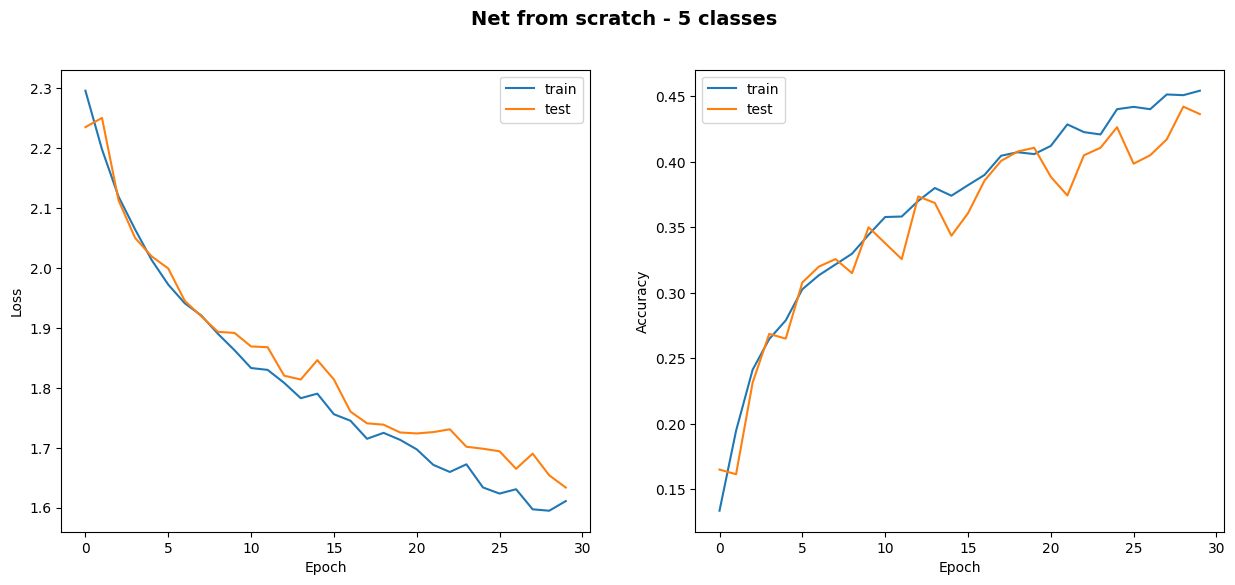

In [36]:

# Visualization of the learning
# Loss
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.suptitle("Net from scratch - 5 classes", fontsize=14, fontweight='bold')

In [37]:
net.save('best_5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:

class_probs = net.predict(test_images)

top1 = 0.0

for i, l in enumerate(test_images.labels):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:3]
    if top_values[0] == l:
        top1 += 1.0

print("top1 acc", top1/len(test_images.labels))

47/47 [==============================] - 9s 187ms/step
top1 acc 0.165


In [39]:

#classification report

predictions = np.argmax(class_probs, axis=1)
cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

print("Classification Report:\n----------------------\n", clr)


Classification Report:
----------------------
               precision    recall  f1-score   support

   cup_cakes       0.72      0.11      0.20       300
     falafel       0.12      0.59      0.20       300
french_fries       0.39      0.04      0.08       300
     gnocchi       0.18      0.37      0.24       300
   hamburger       0.13      0.16      0.14       300
     lasagna       0.31      0.02      0.03       300
       pizza       0.45      0.07      0.12       300
       sushi       0.00      0.00      0.00       300
       tacos       0.18      0.01      0.01       300
     waffles       0.21      0.28      0.24       300

    accuracy                           0.17      3000
   macro avg       0.27      0.16      0.13      3000
weighted avg       0.27      0.17      0.13      3000



In [ ]:

#confusion matrix

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(5) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(5) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

https://github.com/keras-team/keras/issues/3338  data augmentation

Enhance net


*   Little Augmentation

More conv2D, pooling (more complexity, better results)
Batch normalization layers (more stability, prevent saturation activations)
Dropout (prevent overfitting)


More conv2D, pooling (more complexity, better results)

Batch normalization layers (more stability, prevent saturation activations)


Dropout (prevent overfitting)

*little Data augmentation**

In [ ]:
Dimport tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt





# Define the data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2  # Set validation split
)
# Define the data generator for validation and test data (without augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create the data generators
train_images = train_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = val_test_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = val_test_datagen.flow_from_dataframe(
    dataframe=stest,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


In [63]:
# Number of classes
num_classes = 10

# Input shape
input_shape = (224, 224, 3)

# Regularization parameter
l2_reg = 0.001

# Architecture definition (v2)
inputs = tf.keras.Input(input_shape)

# First convolutional block
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(inputs)
x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Second convolutional block
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Third convolutional block
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Fourth convolutional block
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)

# Global average pooling
x = layers.GlobalAveragePooling2D()(x)

# Fully connected layers
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

# Output layer
outputs = layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(l2_reg))(x)


In [64]:
# Create the model
model = models.Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_22 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_23 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 112, 112, 32)      128       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 112, 112, 32)      0   

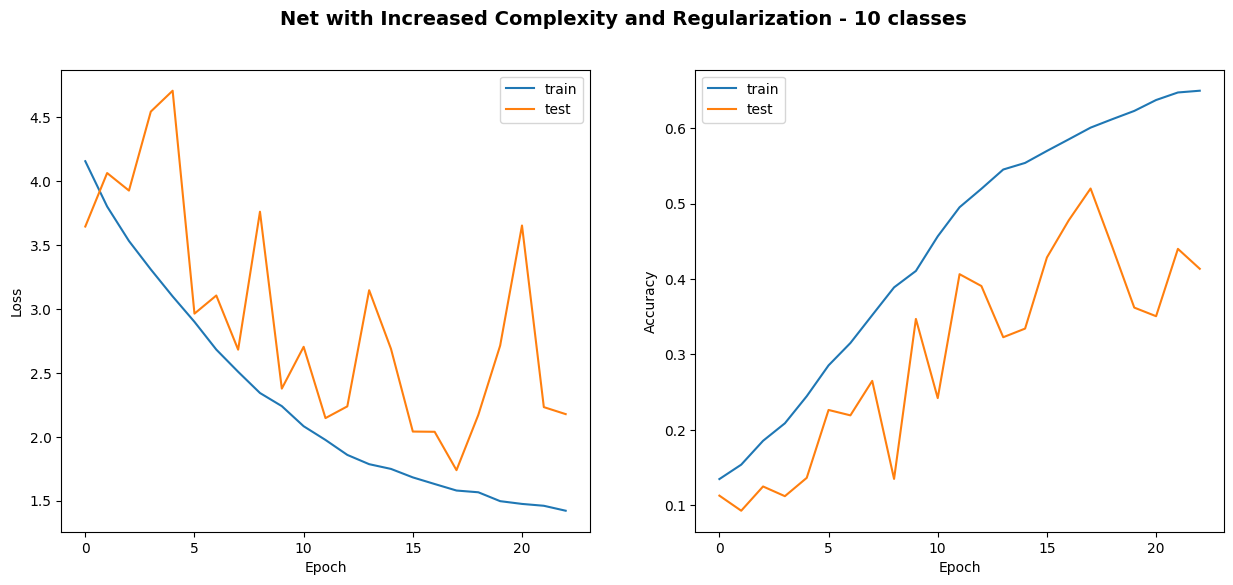

In [50]:
# Visualization of the learning curves
plt.figure(figsize=(15, 6))
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.suptitle("Net with Increased Complexity and Regularization - 10 classes", fontsize=14, fontweight='bold')
plt.show()

47/47 [==============================] - 10s 204ms/step


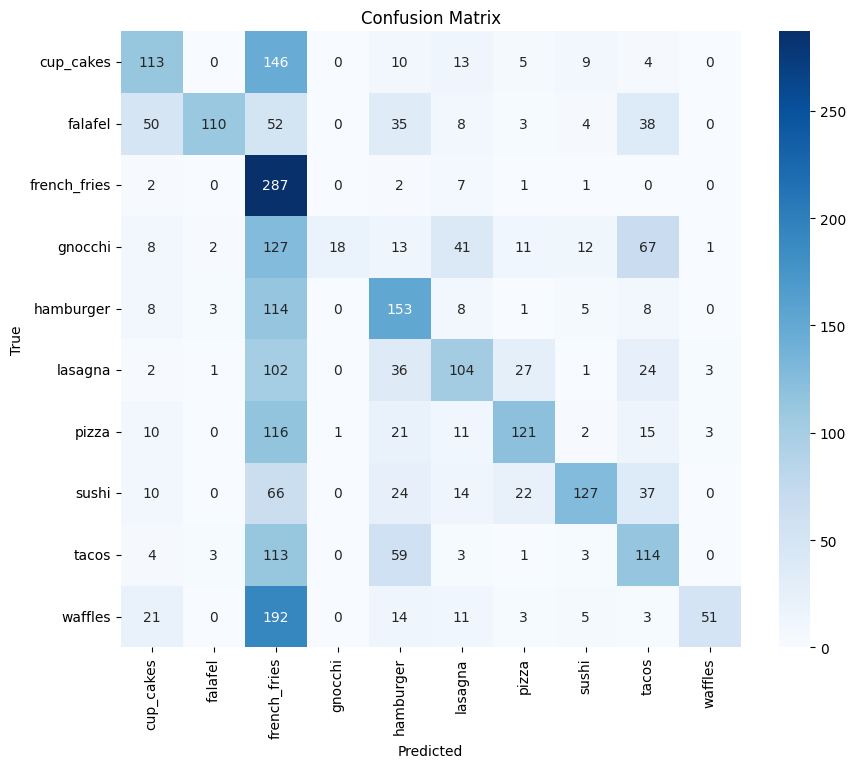

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes on the test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_images.classes

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_images.class_indices.keys(), yticklabels=test_images.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [59]:

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_images.class_indices.keys()))

              precision    recall  f1-score   support

   cup_cakes       0.50      0.38      0.43       300
     falafel       0.92      0.37      0.53       300
french_fries       0.22      0.96      0.36       300
     gnocchi       0.95      0.06      0.11       300
   hamburger       0.42      0.51      0.46       300
     lasagna       0.47      0.35      0.40       300
       pizza       0.62      0.40      0.49       300
       sushi       0.75      0.42      0.54       300
       tacos       0.37      0.38      0.37       300
     waffles       0.88      0.17      0.28       300

    accuracy                           0.40      3000
   macro avg       0.61      0.40      0.40      3000
weighted avg       0.61      0.40      0.40      3000



In [58]:
from sklearn.metrics import accuracy_score


# Predict the classes on the test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_images.classes

# Calculate the top-1 accuracy
top1_acc = accuracy_score(y_true, y_pred_classes)
print("Top-1 Accuracy: {:.2f}%".format(top1_acc * 100))


47/47 [==============================] - 9s 188ms/step
Top-1 Accuracy: 39.93%


**More extra Augmentation**

In [61]:
Dimport tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt




# Define the data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation
    width_shift_range=0.2,  # Increased width shift
    height_shift_range=0.2,  # Increased height shift
    shear_range=0.2,  # Added shear transformation
    zoom_range=0.2,  # Increased zoom range
    horizontal_flip=True,  # Horizontal flip
    vertical_flip=True,  # Added vertical flip
    brightness_range=[0.8, 1.2],  # Brightness adjustment
    channel_shift_range=0.2,  # Random channel shift
    fill_mode='nearest',
    validation_split=0.2  # set validation split
)




# Define the data generator for validation and test data (without augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create the data generators
train_images = train_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = val_test_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = val_test_datagen.flow_from_dataframe(
    dataframe=stest,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 5600 validated image filenames belonging to 10 classes.
Found 1400 validated image filenames belonging to 10 classes.
Found 3000 validated image filenames belonging to 10 classes.


In [65]:
# Model training
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_images,
    epochs=30,
    validation_data=val_images,
    callbacks=[callback],
    verbose=1
)

Epoch 1/30
88/88 [==============================] - 88s 948ms/step - loss: 4.0793 - accuracy: 0.1462 - val_loss: 3.6498 - val_accuracy: 0.1443
Epoch 2/30
88/88 [==============================] - 84s 951ms/step - loss: 3.7035 - accuracy: 0.1777 - val_loss: 3.8486 - val_accuracy: 0.1243
Epoch 3/30
88/88 [==============================] - 84s 946ms/step - loss: 3.4647 - accuracy: 0.1968 - val_loss: 3.6917 - val_accuracy: 0.1286
Epoch 4/30
88/88 [==============================] - 85s 957ms/step - loss: 3.2267 - accuracy: 0.2332 - val_loss: 3.4159 - val_accuracy: 0.1486
Epoch 5/30
88/88 [==============================] - 85s 957ms/step - loss: 3.0360 - accuracy: 0.2530 - val_loss: 3.8451 - val_accuracy: 0.1257
Epoch 6/30
88/88 [==============================] - 85s 957ms/step - loss: 2.8948 - accuracy: 0.2795 - val_loss: 3.0584 - val_accuracy: 0.2064
Epoch 7/30
88/88 [==============================] - 84s 956ms/step - loss: 2.7076 - accuracy: 0.3045 - val_loss: 3.2945 - val_accuracy: 0.1414

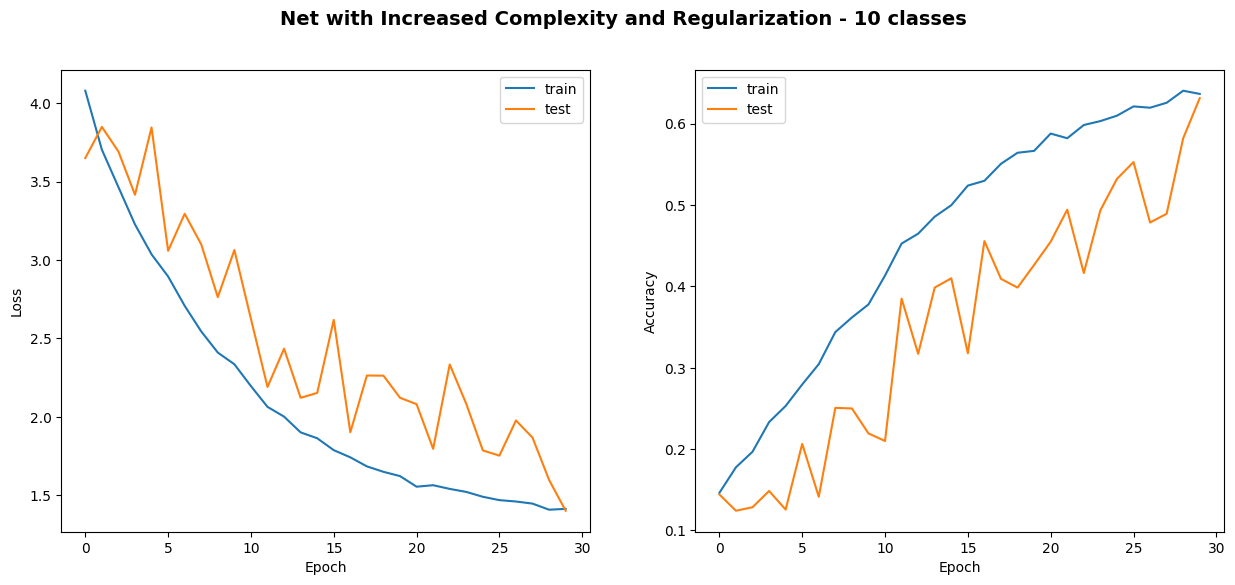

In [66]:
# Visualization of the learning curves
plt.figure(figsize=(15, 6))
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.suptitle("Net with Increased Complexity and Regularization - 10 classes", fontsize=14, fontweight='bold')
plt.show()

47/47 [==============================] - 9s 195ms/step


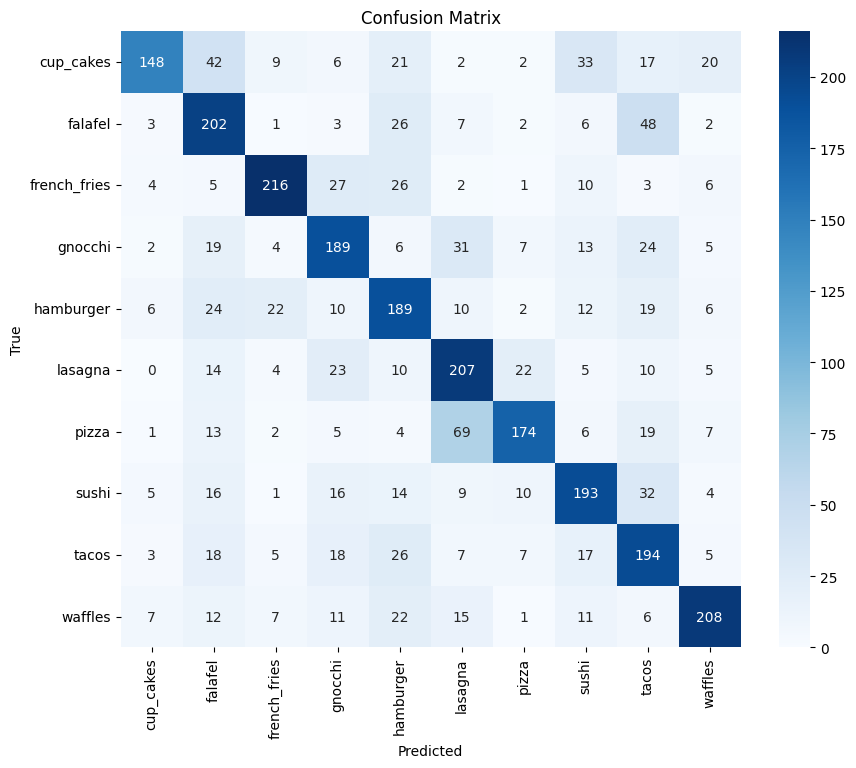

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes on the test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_images.classes

# Compute the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_images.class_indices.keys(), yticklabels=test_images.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [68]:

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_images.class_indices.keys()))

              precision    recall  f1-score   support

   cup_cakes       0.83      0.49      0.62       300
     falafel       0.55      0.67      0.61       300
french_fries       0.80      0.72      0.76       300
     gnocchi       0.61      0.63      0.62       300
   hamburger       0.55      0.63      0.59       300
     lasagna       0.58      0.69      0.63       300
       pizza       0.76      0.58      0.66       300
       sushi       0.63      0.64      0.64       300
       tacos       0.52      0.65      0.58       300
     waffles       0.78      0.69      0.73       300

    accuracy                           0.64      3000
   macro avg       0.66      0.64      0.64      3000
weighted avg       0.66      0.64      0.64      3000



In [69]:
from sklearn.metrics import accuracy_score


# Predict the classes on the test data
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_images.classes

# Calculate the top-1 accuracy
top1_acc = accuracy_score(y_true, y_pred_classes)
print("Top-1 Accuracy: {:.2f}%".format(top1_acc * 100))


47/47 [==============================] - 9s 192ms/step
Top-1 Accuracy: 64.00%


In [71]:
model.save('best64per_one_aug.h5')

Fine-tune the model: Set the base model to trainable, recompiled the model with a lower learning rate, and trained for another 30 epochs with early stopping.

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_images = train_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_datagen.flow_from_dataframe(
    dataframe=stest,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 5600 validated image filenames belonging to 10 classes.
Found 1400 validated image filenames belonging to 10 classes.
Found 3000 validated image filenames belonging to 10 classes.


In [73]:

# Learning rate schedule
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model2 = tf.keras.Model(inputs=base_model.input, outputs=outputs)



94765736/94765736 [==============================] - 3s 0us/step


In [74]:

# Compile the model
model2.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model2.fit(train_images,
                    epochs=30,
                    validation_data=val_images,
                    callbacks=[callback, EarlyStopping(monitor='val_loss', patience=5)],
                    verbose=1)

# Fine-tune the model
base_model.trainable = True

model2.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_fine = model2.fit(train_images,
                         epochs=30,
                         validation_data=val_images,
                         callbacks=[callback, EarlyStopping(monitor='val_loss', patience=5)],
                         verbose=1)

Epoch 1/30
175/175 [==============================] - 110s 597ms/step - loss: 2.7950 - accuracy: 0.1625 - val_loss: 2.7004 - val_accuracy: 0.1421 - lr: 0.0010
Epoch 2/30
175/175 [==============================] - 97s 557ms/step - loss: 2.5460 - accuracy: 0.1863 - val_loss: 2.7863 - val_accuracy: 0.1414 - lr: 0.0010
Epoch 3/30
175/175 [==============================] - 97s 551ms/step - loss: 2.4092 - accuracy: 0.2068 - val_loss: 2.9146 - val_accuracy: 0.2014 - lr: 0.0010
Epoch 4/30
175/175 [==============================] - 96s 551ms/step - loss: 2.3460 - accuracy: 0.2282 - val_loss: 3.2192 - val_accuracy: 0.1157 - lr: 0.0010
Epoch 5/30
175/175 [==============================] - 97s 556ms/step - loss: 2.2751 - accuracy: 0.2325 - val_loss: 6.2719 - val_accuracy: 0.0936 - lr: 0.0010
Epoch 6/30
175/175 [==============================] - 97s 551ms/step - loss: 2.2783 - accuracy: 0.2338 - val_loss: 2.5831 - val_accuracy: 0.1936 - lr: 0.0010
Epoch 7/30
175/175 [==============================]

In [88]:

model2.save('new_resnet_10class.h5')

In [75]:

# Predict the test set
y_pred = model2.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_images.classes

# Calculate top-1 accuracy
top1_acc = accuracy_score(y_true, y_pred_classes)
print("Top-1 Accuracy: {:.2f}%".format(top1_acc * 100))



94/94 [==============================] - 10s 102ms/step
Top-1 Accuracy: 86.10%


In [78]:

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=test_images.class_indices.keys()))

              precision    recall  f1-score   support

   cup_cakes       0.91      0.94      0.92       300
     falafel       0.93      0.69      0.79       300
french_fries       0.96      0.91      0.93       300
     gnocchi       0.82      0.87      0.85       300
   hamburger       0.81      0.91      0.86       300
     lasagna       0.81      0.82      0.82       300
       pizza       0.93      0.83      0.88       300
       sushi       0.90      0.86      0.88       300
       tacos       0.74      0.87      0.80       300
     waffles       0.86      0.90      0.88       300

    accuracy                           0.86      3000
   macro avg       0.87      0.86      0.86      3000
weighted avg       0.87      0.86      0.86      3000



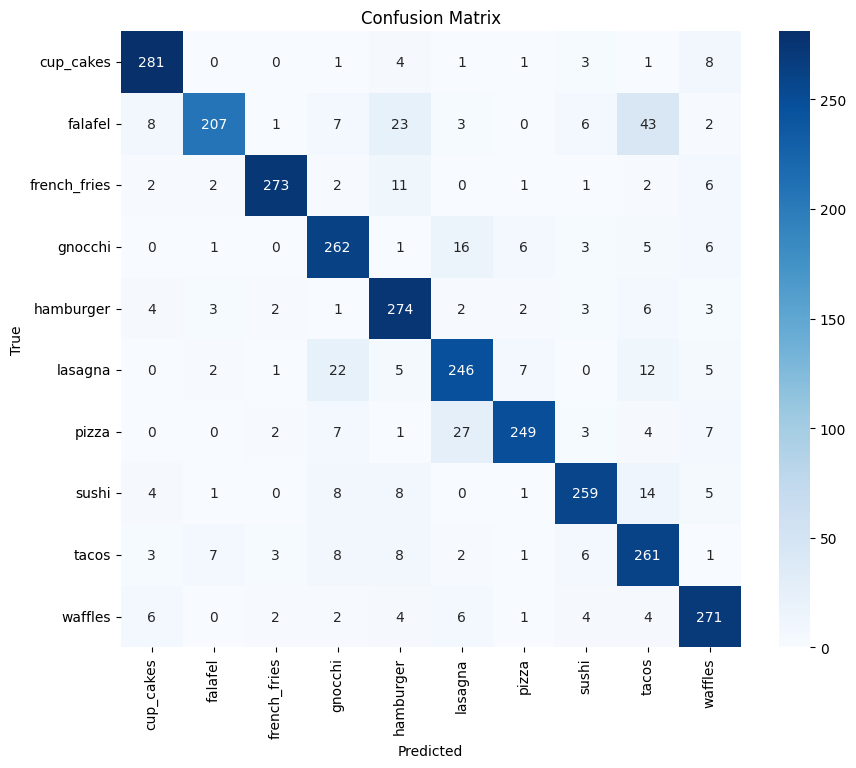

In [76]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm_labels = list(test_images.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_labels, yticklabels=cm_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Gamma correction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def image_agcwd(img, a=0.25):
    h, w, c = img.shape
    img_new = np.zeros_like(img)

    for channel in range(c):
        hist, bins = np.histogram(img[:, :, channel].flatten(), 256, [0, 256])
        cdf = hist.cumsum()
        cdf_normalized = cdf / cdf.max()
        prob_normalized = hist / hist.sum()

        unique_intensity = np.unique(img[:, :, channel])
        intensity_max = unique_intensity.max()
        intensity_min = unique_intensity.min()
        prob_min = prob_normalized.min()
        prob_max = prob_normalized.max()

        pn_temp = (prob_normalized - prob_min) / (prob_max - prob_min)
        pn_temp[pn_temp > 0] = prob_max * (pn_temp[pn_temp > 0] ** a)
        pn_temp[pn_temp < 0] = prob_max * (-((-pn_temp[pn_temp < 0]) ** a))
        prob_normalized_wd = pn_temp / pn_temp.sum()  # normalize to [0,1]
        cdf_prob_normalized_wd = prob_normalized_wd.cumsum()
        inverse_cdf = 1 - cdf_prob_normalized_wd

        for i in unique_intensity:
            img_new[:, :, channel][img[:, :, channel] == i] = np.round(255 * (i / 255) ** inverse_cdf[i])

    plt.plot(inverse_cdf, color='b')
    plt.show()

    # Histogram Equalization
    img_hist_eq = np.zeros_like(img_new)
    for channel in range(c):
        img_hist_eq[:, :, channel] = cv2.equalizeHist(img_new[:, :, channel])

    # Reduce the sharpening kernel strength
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]]) * 0.5
    img_sharpened = cv2.filter2D(img_hist_eq, -1, kernel)

    # Reduce the color adjustment strength
    img_color_adjusted = cv2.convertScaleAbs(img_sharpened, alpha=1.05, beta=10)

    return img_color_adjusted


In [ ]:
import os
import shutil

# Paths to the Food-5K dataset
source_train_dir = '/content/training'
source_val_dir = '/content/validation'
source_eval_dir = '/content/evaluation'

# New directories for organized data
base_dir = 'food_vs_non_food'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
eval_dir = os.path.join(base_dir, 'evaluation')

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(eval_dir, exist_ok=True)

# Subdirectories for food and non_food
train_food_dir = os.path.join(train_dir, 'food')
train_non_food_dir = os.path.join(train_dir, 'non_food')
val_food_dir = os.path.join(val_dir, 'food')
val_non_food_dir = os.path.join(val_dir, 'non_food')
eval_food_dir = os.path.join(eval_dir, 'food')
eval_non_food_dir = os.path.join(eval_dir, 'non_food')

# Create subdirectories
os.makedirs(train_food_dir, exist_ok=True)
os.makedirs(train_non_food_dir, exist_ok=True)
os.makedirs(val_food_dir, exist_ok=True)
os.makedirs(val_non_food_dir, exist_ok=True)
os.makedirs(eval_food_dir, exist_ok=True)
os.makedirs(eval_non_food_dir, exist_ok=True)

# Function to copy images to the new directories
def organize_data(source_dir, target_food_dir, target_non_food_dir):
    for category in ['food', 'non_food']:
        source_category_dir = os.path.join(source_dir, category)
        target_dir = target_non_food_dir if category == 'non_food' else target_food_dir

        for fname in os.listdir(source_category_dir):
            src = os.path.join(source_category_dir, fname)
            dst = os.path.join(target_dir, fname)
            shutil.copyfile(src, dst)

# Organize training, validation, and evaluation data
organize_data(source_train_dir, train_food_dir, train_non_food_dir)
organize_data(source_val_dir, val_food_dir, val_non_food_dir)
organize_data(source_eval_dir, eval_food_dir, eval_non_food_dir)

print("Data organized successfully.")


Data organized successfully.


In [ ]:
# Load the trained classifier
classifier = load_model('food_vs_non_food_classifier.h5')

def is_food_image(img_path, model, threshold=0.5):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    return prediction[0][0] > threshold

# Directory of Food-101 dataset
food101_dir = '/content/food-101/images/'

# Filter and save valid food images
filtered_dir = '/content/food-101/filtered/'
os.makedirs(filtered_dir, exist_ok=True)

# Sample categories to filter
sample_categories = sample

for root, _, files in os.walk(food101_dir):
    for file in files:
        img_path = os.path.join(root, file)
        # Get category from the relative path
        relative_path = os.path.relpath(img_path, food101_dir)
        category = os.path.dirname(relative_path)

        if category in sample_categories and is_food_image(img_path, classifier):
            # Create corresponding directory in the filtered dataset
            filtered_category_dir = os.path.join(filtered_dir, category)
            os.makedirs(filtered_category_dir, exist_ok=True)

            # Save the filtered image to the corresponding directory
            filtered_path = os.path.join(filtered_category_dir, file)
            cv2.imwrite(filtered_path, cv2.imread(img_path))

print("Filtering complete.")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step
Filtering complete.


In [ ]:
import os
import pandas as pd

# Directory of the filtered Food-101 dataset
filtered_dir = '/content/food-101/filtered/'

# List to store file paths and labels
filtered_images = []

# Walk through the filtered directory
for root, _, files in os.walk(filtered_dir):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Include relevant image file extensions
            img_path = os.path.join(root, file)
            # Get category from the relative path
            relative_path = os.path.relpath(img_path, filtered_dir)
            category = os.path.dirname(relative_path)

            # Append file path and label to the list
            filtered_images.append((img_path, category))

# Create a DataFrame
df_filtered_images = pd.DataFrame(filtered_images, columns=['Filepath', 'Label'])

# Save the DataFrame to a CSV file
csv_path = '/content/food-101/filtered_images.csv'
df_filtered_images.to_csv(csv_path, index=False)

print("DataFrame created and saved to", csv_path)


DataFrame created and saved to /content/food-101/filtered_images.csv


### Let's Test the Model Against 51 Classes

In [112]:
import random

all_classes = train_df['Label'].unique()

random_classes = random.sample(list(all_classes), 51)


In [16]:
strain = train_df[train_df['Label'].isin(classes)]
stest = test_df[test_df['Label'].isin(classes)]

**Transfer learning with ResNet50**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)



test_datagen = ImageDataGenerator(rescale=1./255)

train_images = train_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_datagen.flow_from_dataframe(
    dataframe=stest,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


In [18]:

num_classes = 51
height = 224
width = 224
channels = 3
batch_size = 64
img_shape = (height, width, channels)
img_size = (height, width)

In [116]:
# load pre-trained InceptionV3
base_net = ResNet50(weights='imagenet', include_top=False,
                          input_shape=img_shape, pooling='avg')


#freeze
for layer in base_net.layers:
    layer.trainable = False


In [117]:
# List to store learning rates
learning_rates = []

# Custom callback to record learning rate at each epoch
class LearningRateRecorder(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.lr.numpy()
        learning_rates.append(lr)

# Create an instance of the callback
lr_recorder = LearningRateRecorder()

# Learning rate schedule
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Add custom layers on top
inputs = base_model.input  # Connect the input layer correctly
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create the model
net0 = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
net0.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])


In [84]:

inputs = base_net.input

x = Dense(128, activation='relu')(base_net.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Specialized model
net = keras.Model(inputs=inputs, outputs=outputs)

net.compile(optimizer = Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])


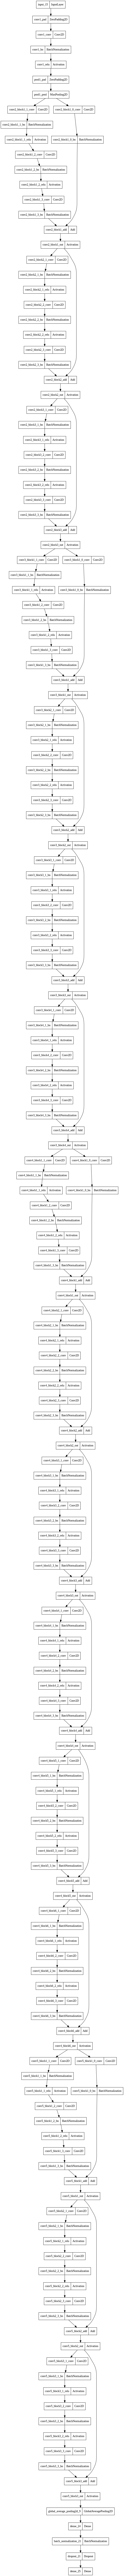

In [107]:

# Visualization in graphical form
keras.utils.plot_model(net0, to_file='model.png')

# Fine-tune the model
base_model.trainable = True

net0.compile(optimizer=Adam(learning_rate=1e-5),
            loss='categorical_crossentropy',
            metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])

history_fine = net0.fit(train_images,
                         epochs=30,
                         validation_data=val_images,
                         callbacks=[callback, EarlyStopping(monitor='val_loss', patience=5), lr_recorder],
                         verbose=1)

In [118]:

# Model training
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Train the model
history = net0.fit(train_images,
                    epochs=30,
                    validation_data=val_images,
                    callbacks=[callback, EarlyStopping(monitor='val_loss', patience=5), lr_recorder],
                    verbose=1)



Epoch 1/30
893/893 [==============================] - 508s 564ms/step - loss: 4.2794 - accuracy: 0.0427 - top_k_categorical_accuracy: 0.1093 - val_loss: 4.7154 - val_accuracy: 0.0364 - val_top_k_categorical_accuracy: 0.0940
Epoch 2/30
893/893 [==============================] - 496s 555ms/step - loss: 3.9614 - accuracy: 0.0567 - top_k_categorical_accuracy: 0.1393 - val_loss: 4.7112 - val_accuracy: 0.0339 - val_top_k_categorical_accuracy: 0.1000
Epoch 3/30
893/893 [==============================] - 495s 554ms/step - loss: 3.8495 - accuracy: 0.0657 - top_k_categorical_accuracy: 0.1614 - val_loss: 4.9577 - val_accuracy: 0.0363 - val_top_k_categorical_accuracy: 0.0908
Epoch 4/30
893/893 [==============================] - 491s 549ms/step - loss: 3.8208 - accuracy: 0.0663 - top_k_categorical_accuracy: 0.1666 - val_loss: 4.6371 - val_accuracy: 0.0333 - val_top_k_categorical_accuracy: 0.0838
Epoch 5/30
893/893 [==============================] - 491s 550ms/step - loss: 3.7977 - accuracy: 0.0693 

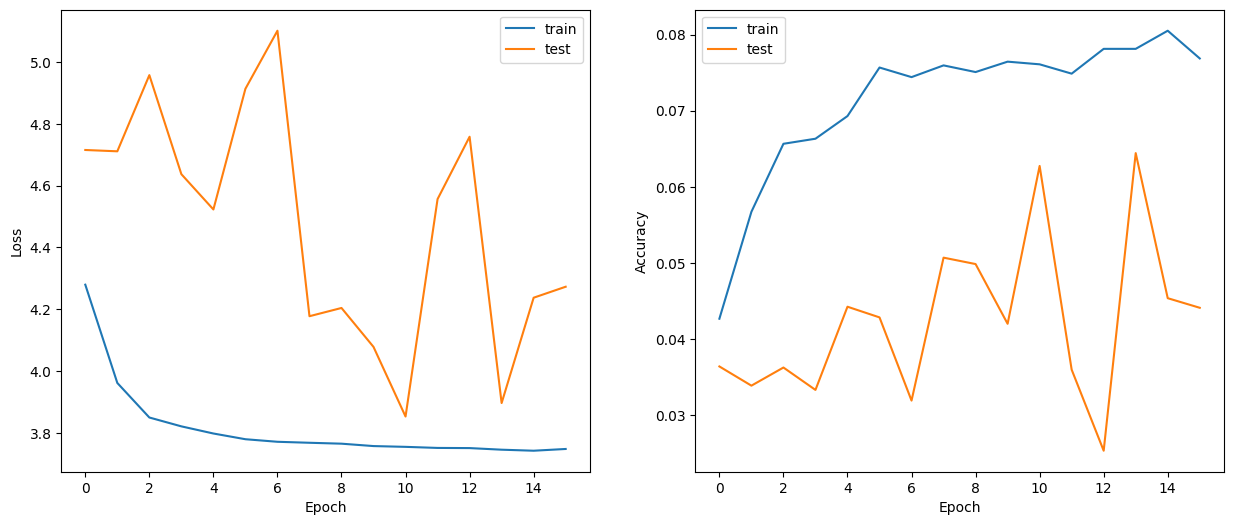

In [122]:

# Visualization of the learning curves
# Loss
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

Transfer Learning with Inception V3

In [19]:
# load pre-trained InceptionV3
base_net = InceptionV3(weights='imagenet', include_top=False,
                          input_shape=img_shape, pooling='avg')


#freeze
for layer in base_net.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 4s 0us/step


In [20]:
# Explicit input layer
inputs = keras.Input(shape=(224, 224, 3))
x = inputs
# Image preprocessing for consistency with the pretrained model
x = keras.applications.inception_v3.preprocess_input(x)
# Output of the base model
x = base_net(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)

net = keras.Model(inputs = inputs, outputs = outputs)

net.compile(optimizer = Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])

In [125]:
net.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense_28 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_23 (Dropout)        (None, 1024)              0  

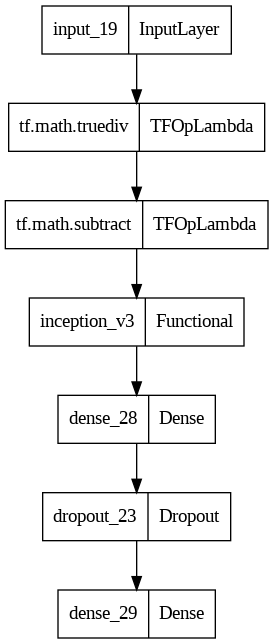

In [126]:

# Show a high-level architecture
keras.utils.plot_model(net)

In [127]:
# Model training
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = net.fit(train_images,
          epochs=30,
          validation_data=val_images,
          callbacks = [callback],
          verbose = 1);


net.save('inception_50class.h5')

Epoch 1/30
893/893 [==============================] - 505s 557ms/step - loss: 3.8826 - accuracy: 0.0355 - top_k_categorical_accuracy: 0.0990 - val_loss: 3.8064 - val_accuracy: 0.0555 - val_top_k_categorical_accuracy: 0.1455
Epoch 2/30
893/893 [==============================] - 493s 552ms/step - loss: 3.8010 - accuracy: 0.0518 - top_k_categorical_accuracy: 0.1300 - val_loss: 3.7551 - val_accuracy: 0.0613 - val_top_k_categorical_accuracy: 0.1592
Epoch 3/30
893/893 [==============================] - 493s 552ms/step - loss: 3.7733 - accuracy: 0.0567 - top_k_categorical_accuracy: 0.1446 - val_loss: 3.7344 - val_accuracy: 0.0714 - val_top_k_categorical_accuracy: 0.1648
Epoch 4/30
893/893 [==============================] - 493s 552ms/step - loss: 3.7560 - accuracy: 0.0578 - top_k_categorical_accuracy: 0.1517 - val_loss: 3.7003 - val_accuracy: 0.0709 - val_top_k_categorical_accuracy: 0.1718
Epoch 5/30
893/893 [==============================] - 500s 560ms/step - loss: 3.7427 - accuracy: 0.0653 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


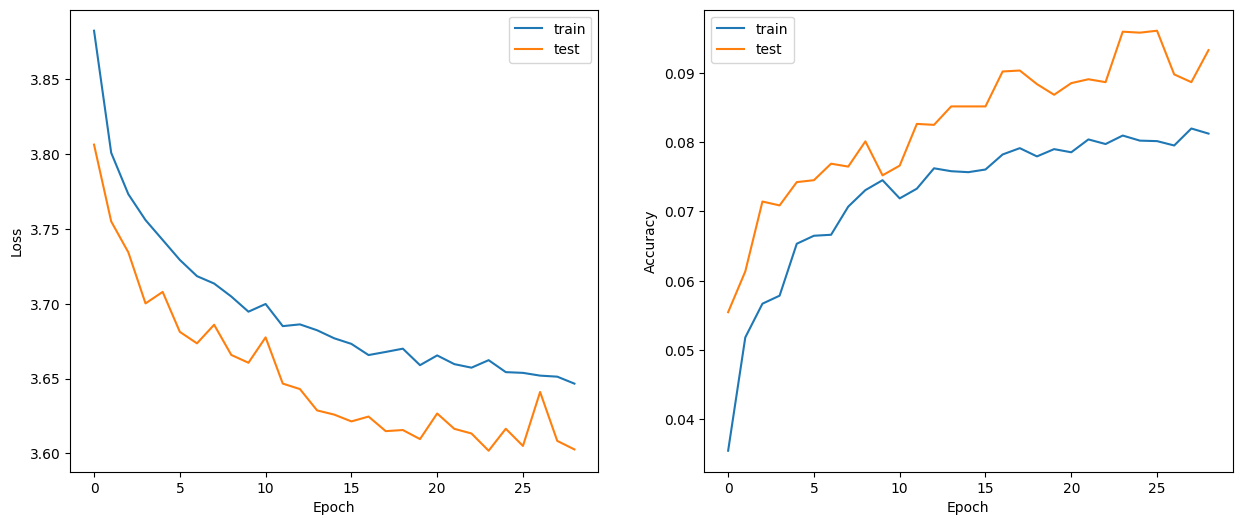

In [128]:


# Visualization of the learning curves
# Loss
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [129]:


net = None
net50_1 = keras.models.load_model('inception_50class.h5')

In [132]:

y_test = test_images.labels

top1 = 0.0
top3 = 0.0
class_probs =net50_1. predict(test_images)

for i, l in enumerate(test_images.labels):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:3]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top3 += 1.0

print("top1 acc", top1/len(test_images.labels))
print("top3 acc", top3/len(test_images.labels))

479/479 [==============================] - 40s 80ms/step
top1 acc 0.10725490196078431
top3 acc 0.23483660130718953


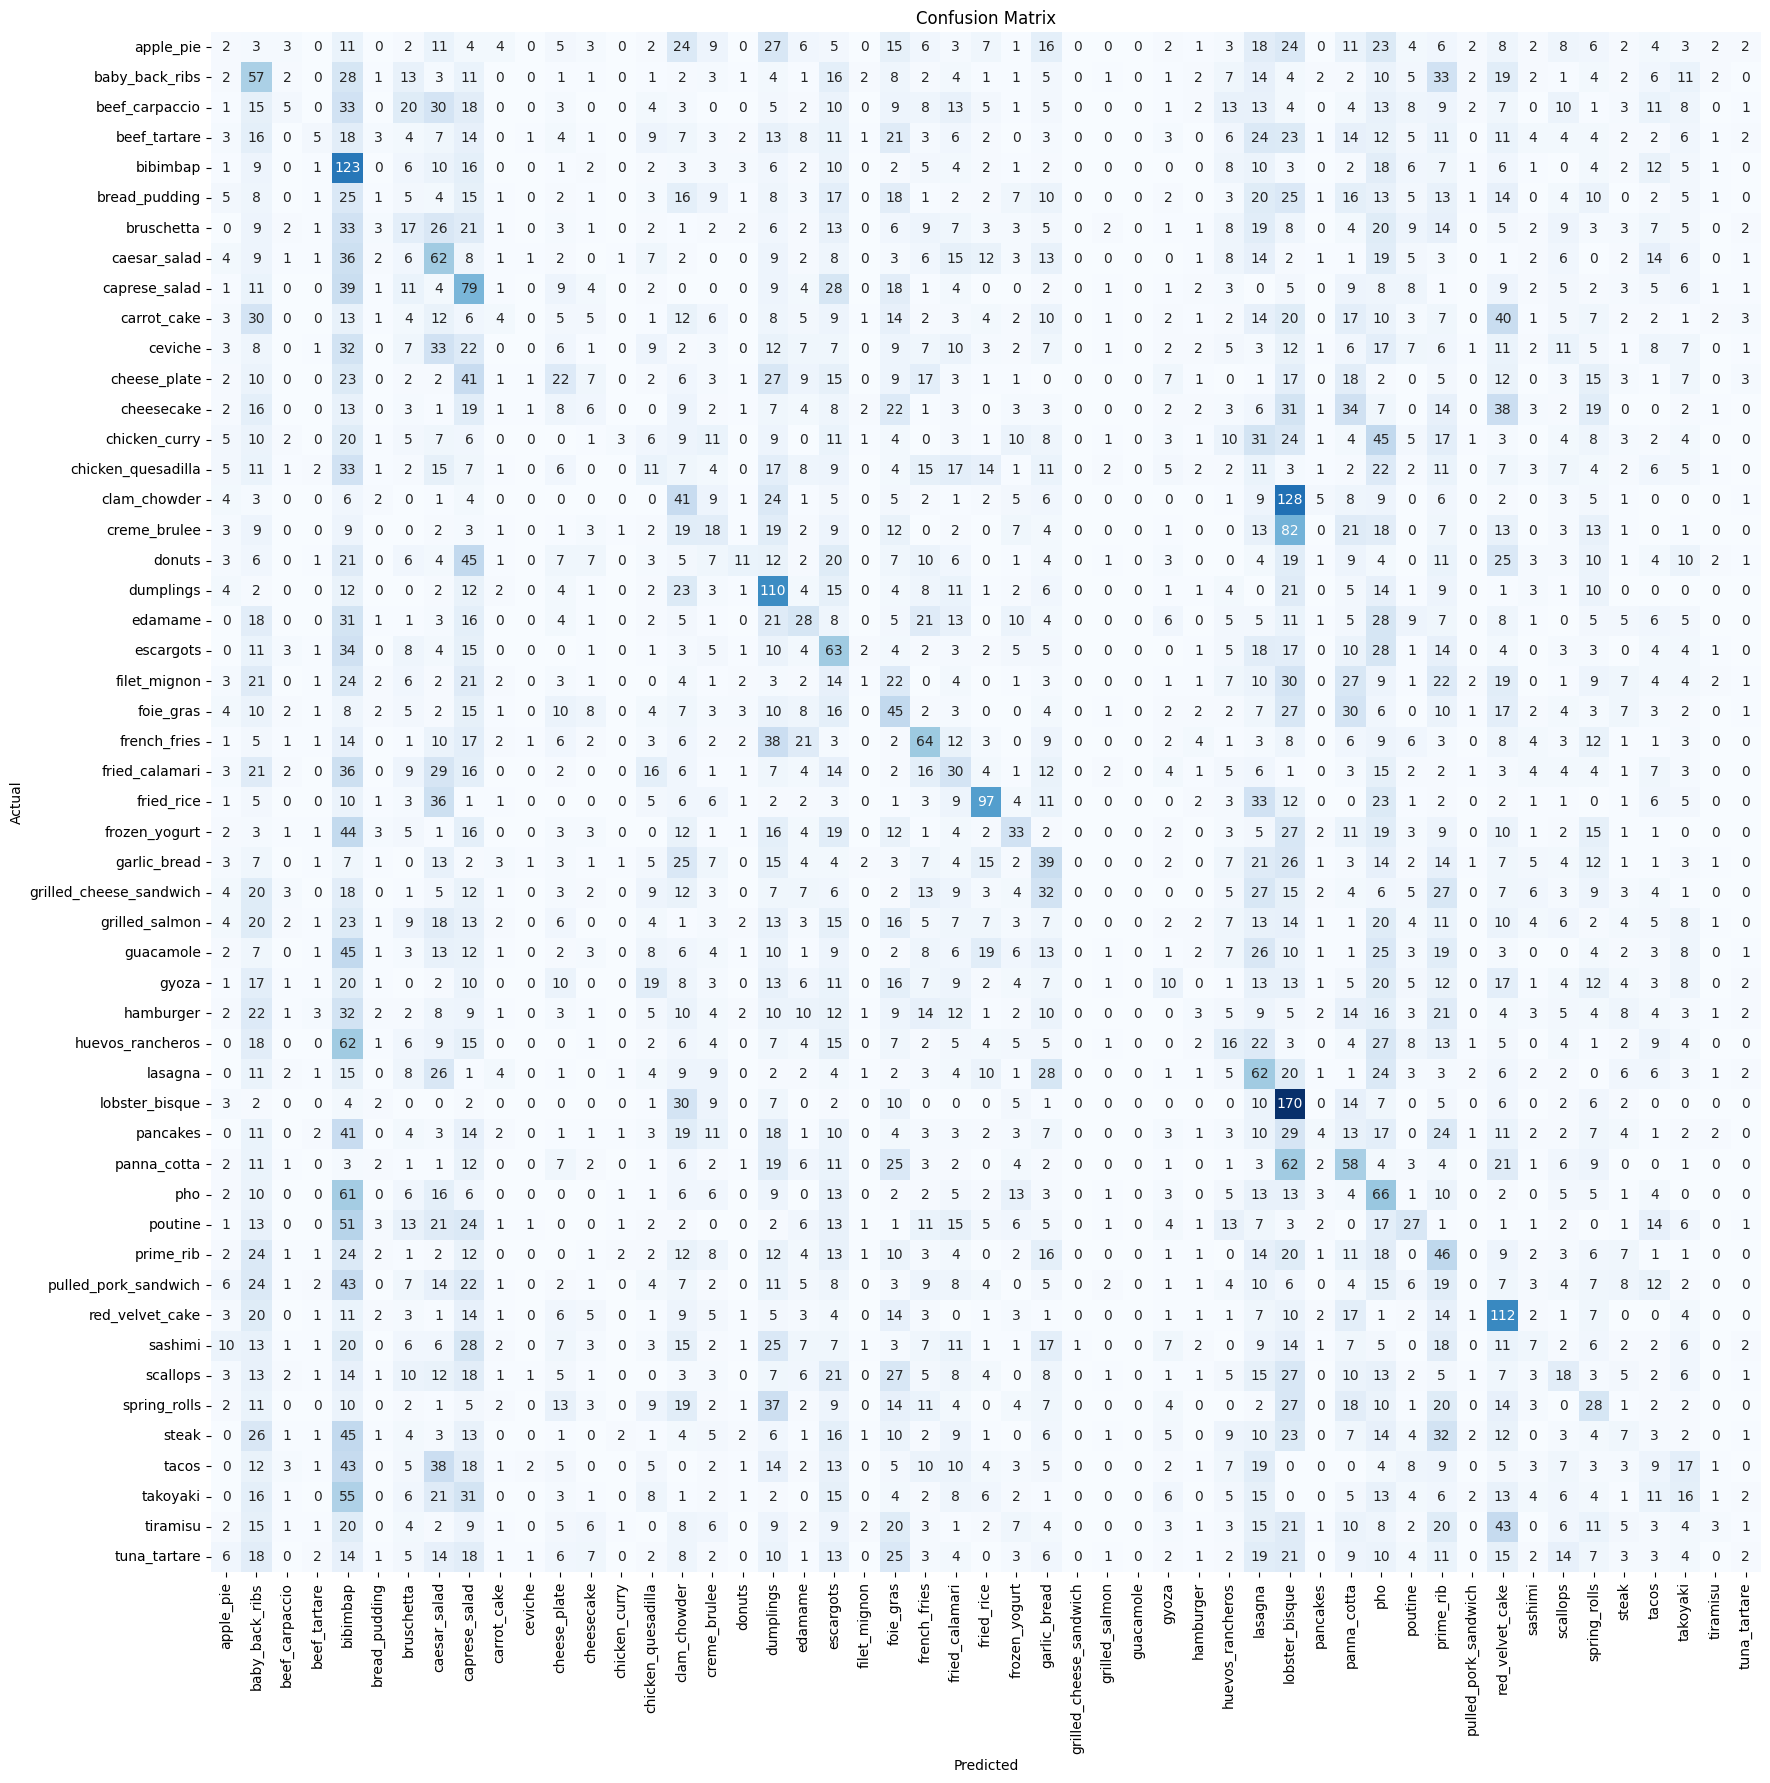

In [134]:
predictions = np.argmax(class_probs, axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)


plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(51) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(51) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
classes = [
    "apple_pie", "baby_back_ribs", "beef_carpaccio", "beef_tartare", "bibimbap",
    "bread_pudding", "bruschetta", "caesar_salad", "caprese_salad", "carrot_cake",
    "ceviche", "cheese_plate", "cheesecake", "chicken_curry", "chicken_quesadilla",
    "clam_chowder", "creme_brulee", "donuts", "dumplings", "edamame",
    "escargots", "filet_mignon", "foie_gras", "french_fries", "fried_calamari",
    "fried_rice", "frozen_yogurt", "garlic_bread", "grilled_cheese_sandwich",
    "grilled_salmon", "guacamole", "gyoza", "hamburger", "huevos_rancheros",
    "lasagna", "lobster_bisque", "pancakes", "panna_cotta", "pho",
    "poutine", "prime_rib", "pulled_pork_sandwich", "red_velvet_cake",
    "sashimi", "scallops", "spring_rolls", "steak", "tacos",
    "takoyaki", "tiramisu", "tuna_tartare"
]


In [14]:
len(classes)

51

without preprocess
in inception

In [21]:
inputs = keras.Input(shape=(224, 224, 3))
x = inputs
x = base_net(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Specialized model
net = keras.Model(inputs=inputs, outputs=outputs)

net.compile(optimizer = Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])


In [22]:

net.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 51)                52275     
                                                                 
Total params: 23953235 (91.37 MB)
Trainable params: 2150451 (8.20 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_images = train_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_datagen.flow_from_dataframe(
    dataframe=strain,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_datagen.flow_from_dataframe(
    dataframe=stest,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 28560 validated image filenames belonging to 51 classes.
Found 7140 validated image filenames belonging to 51 classes.
Found 15300 validated image filenames belonging to 51 classes.


In [32]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

# Train the model
history = net.fit(train_images,
                  epochs=30,
                  validation_data=val_images,
                  callbacks=[early_stopping, lr_reduction],
                  verbose=1)

# Fine-tune the model
base_net.trainable = True
net.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
            loss='categorical_crossentropy',
            metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])

history_fine = net.fit(train_images,
                       epochs=30,
                       validation_data=val_images,
                       callbacks=[early_stopping, lr_reduction],
                       verbose=1)

net.save('new_inception_50.h5')



Epoch 1/30
893/893 [==============================] - 496s 555ms/step - loss: 2.2550 - accuracy: 0.3938 - top_k_categorical_accuracy: 0.6052 - val_loss: 2.0801 - val_accuracy: 0.4468 - val_top_k_categorical_accuracy: 0.6524 - lr: 0.0010
Epoch 2/30
893/893 [==============================] - 489s 547ms/step - loss: 2.1877 - accuracy: 0.4103 - top_k_categorical_accuracy: 0.6226 - val_loss: 2.0914 - val_accuracy: 0.4360 - val_top_k_categorical_accuracy: 0.6535 - lr: 0.0010
Epoch 3/30
893/893 [==============================] - 483s 541ms/step - loss: 2.1284 - accuracy: 0.4277 - top_k_categorical_accuracy: 0.6380 - val_loss: 2.0023 - val_accuracy: 0.4594 - val_top_k_categorical_accuracy: 0.6742 - lr: 0.0010
Epoch 4/30
893/893 [==============================] - 485s 543ms/step - loss: 2.1044 - accuracy: 0.4300 - top_k_categorical_accuracy: 0.6422 - val_loss: 2.0073 - val_accuracy: 0.4566 - val_top_k_categorical_accuracy: 0.6714 - lr: 0.0010
Epoch 5/30
893/893 [==============================] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
if net is not None:
    print("Model is valid before saving.")
    # Save the model in the recommended Keras format
    net.save('new_inception_510.keras')
else:
    print("Error: Model is None before saving.")

Error: Model is None before saving.


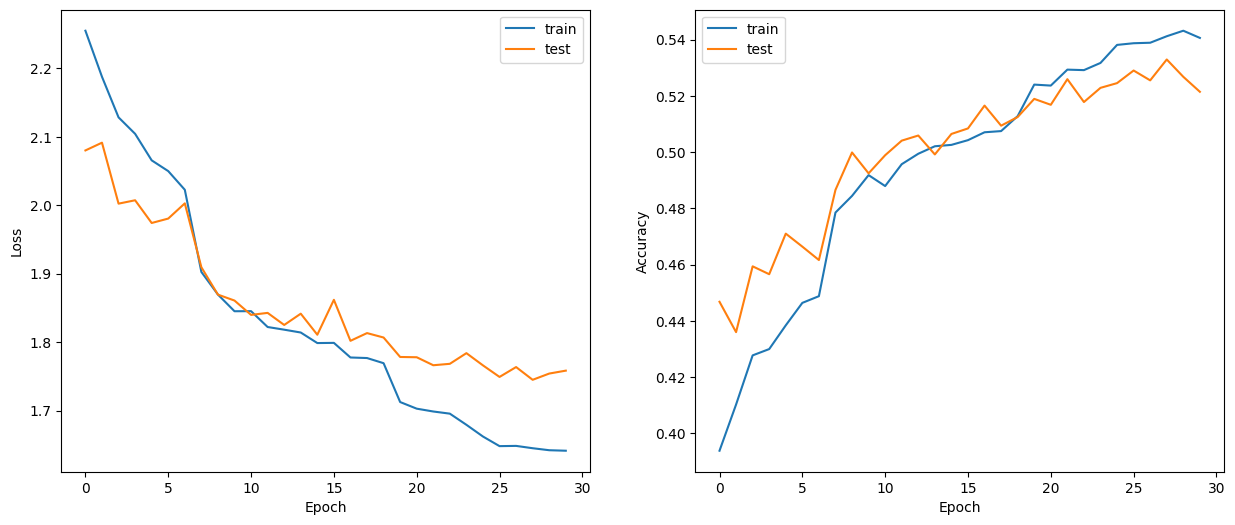

In [33]:
# Visualization of the learning curves
# Loss
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [34]:

y_test = test_images.labels

top1 = 0.0
top3 = 0.0
class_probs = net.predict(test_images)

for i, l in enumerate(test_images.labels):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:3]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top3 += 1.0

print("top1 acc", top1/len(test_images.labels))
print("top3 acc", top3/len(test_images.labels))

479/479 [==============================] - 40s 80ms/step
top1 acc 0.7557516339869281
top3 acc 0.8928104575163399


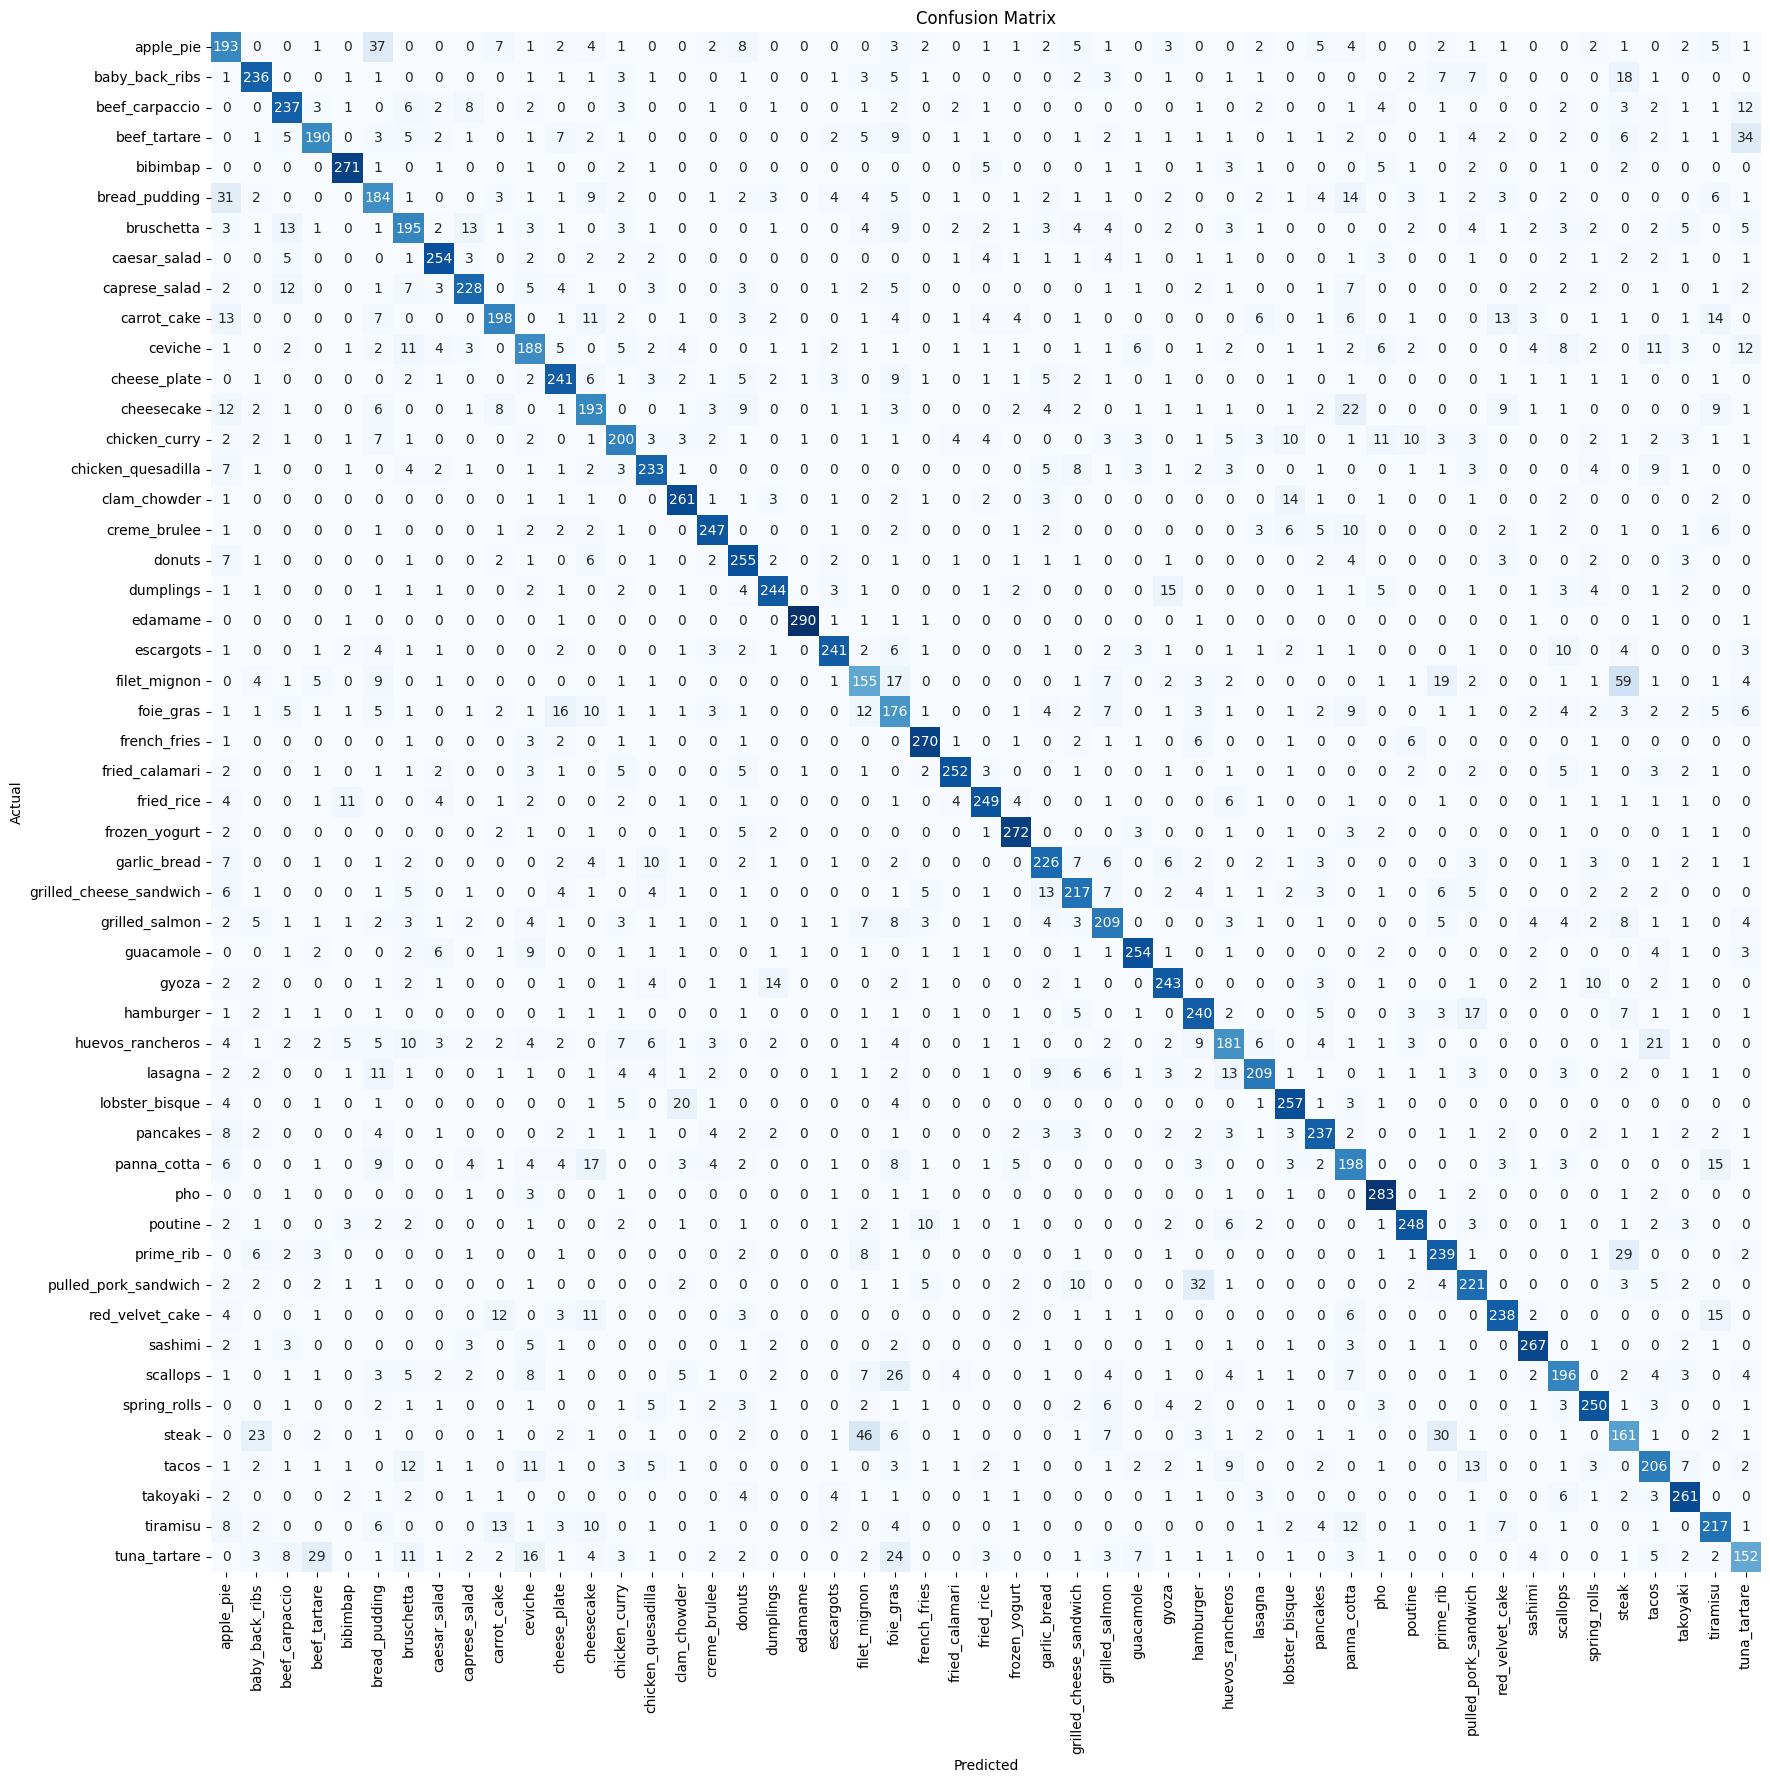

In [35]:
predictions = np.argmax(class_probs, axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)


plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(51) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(51) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Add augmentation on the best net

In [27]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, regularizers, optimizers
# load pre-trained InceptionV3
base_net = InceptionV3(weights='imagenet', include_top=False,
                          input_shape=img_shape, pooling='avg')


#freeze
for layer in base_net.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 5s 0us/step


In [77]:
inputs = keras.Input(shape=(224, 224, 3))
x = inputs

#augmentation
x = keras.layers.RandomFlip()(x) #horizontal_and_vertical
x = keras.layers.RandomContrast(0.25)(x)

x = base_net(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(num_classes, activation='softmax')(x)

# Specialized model
net00 = keras.Model(inputs=inputs, outputs=outputs)

net00.compile(optimizer = Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])


In [31]:
net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_contrast (RandomCon  (None, 224, 224, 3)       0         
 trast)                                                          
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                             

In [32]:

# Model training
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = net.fit(train_images,
          epochs=10,
          validation_data=val_images,
          callbacks = [callback],
          verbose = 1);


net.save('new2_inception_50.h5')

Epoch 1/10
893/893 [==============================] - 509s 558ms/step - loss: 2.6455 - accuracy: 0.3156 - top_k_categorical_accuracy: 0.5072 - val_loss: 2.1383 - val_accuracy: 0.4289 - val_top_k_categorical_accuracy: 0.6377
Epoch 2/10
893/893 [==============================] - 486s 545ms/step - loss: 2.2525 - accuracy: 0.3966 - top_k_categorical_accuracy: 0.6076 - val_loss: 2.1385 - val_accuracy: 0.4245 - val_top_k_categorical_accuracy: 0.6385
Epoch 3/10
893/893 [==============================] - 488s 546ms/step - loss: 2.1828 - accuracy: 0.4112 - top_k_categorical_accuracy: 0.6250 - val_loss: 2.0282 - val_accuracy: 0.4518 - val_top_k_categorical_accuracy: 0.6647
Epoch 4/10
893/893 [==============================] - 479s 537ms/step - loss: 2.1289 - accuracy: 0.4289 - top_k_categorical_accuracy: 0.6357 - val_loss: 2.0341 - val_accuracy: 0.4538 - val_top_k_categorical_accuracy: 0.6626
Epoch 5/10
893/893 [==============================] - 487s 545ms/step - loss: 2.0872 - accuracy: 0.4340 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

# Train the model
history = net00.fit(train_images,
                  epochs=30,
                  validation_data=val_images,
                  callbacks=[early_stopping, lr_reduction],
                  verbose=1)

# Fine-tune the model
base_net.trainable = True
net00.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
            loss='categorical_crossentropy',
            metrics=['accuracy', keras.metrics.TopKCategoricalAccuracy(k=3)])

history_fine = net00.fit(train_images,
                       epochs=30,
                       validation_data=val_images,
                       callbacks=[early_stopping, lr_reduction],
                       verbose=1)

net00.save('new2_inception_50.h5')
# Save the model in the recommended Keras format
net00.save('new2_inception_51.keras')

Epoch 1/30
893/893 [==============================] - 511s 541ms/step - loss: 2.7473 - accuracy: 0.2890 - top_k_categorical_accuracy: 0.4830 - val_loss: 2.8938 - val_accuracy: 0.2754 - val_top_k_categorical_accuracy: 0.4626 - lr: 0.0010
Epoch 2/30
893/893 [==============================] - 477s 534ms/step - loss: 2.1119 - accuracy: 0.4333 - top_k_categorical_accuracy: 0.6494 - val_loss: 2.4308 - val_accuracy: 0.3888 - val_top_k_categorical_accuracy: 0.6043 - lr: 0.0010
Epoch 3/30
893/893 [==============================] - 484s 542ms/step - loss: 1.8643 - accuracy: 0.4959 - top_k_categorical_accuracy: 0.7051 - val_loss: 4.2852 - val_accuracy: 0.1725 - val_top_k_categorical_accuracy: 0.3681 - lr: 0.0010
Epoch 4/30
893/893 [==============================] - 483s 541ms/step - loss: 1.6992 - accuracy: 0.5395 - top_k_categorical_accuracy: 0.7396 - val_loss: 1.9795 - val_accuracy: 0.4783 - val_top_k_categorical_accuracy: 0.6850 - lr: 0.0010
Epoch 5/30
893/893 [==============================] 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


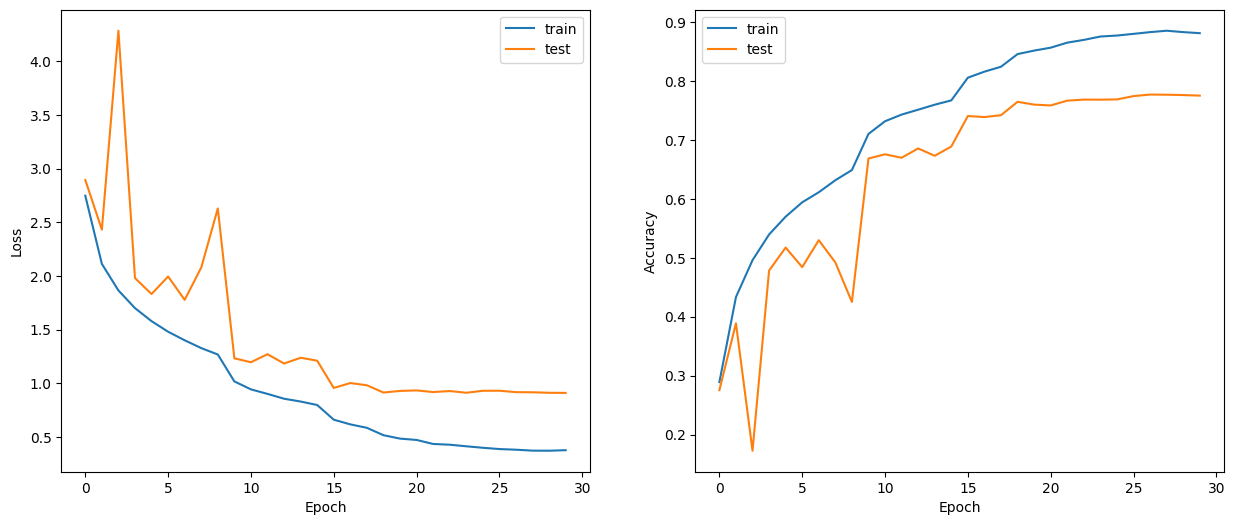

In [79]:
# Visualization of the learning curves
# Loss
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

In [81]:
y_test = test_images.labels

top1 = 0.0
top3 = 0.0
class_probs = net50_2.predict(test_images)

for i, l in enumerate(test_images.labels):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:3]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top3 += 1.0

print("top1 acc", top1/len(test_images.labels))

479/479 [==============================] - 39s 79ms/step
top1 acc 0.7557516339869281


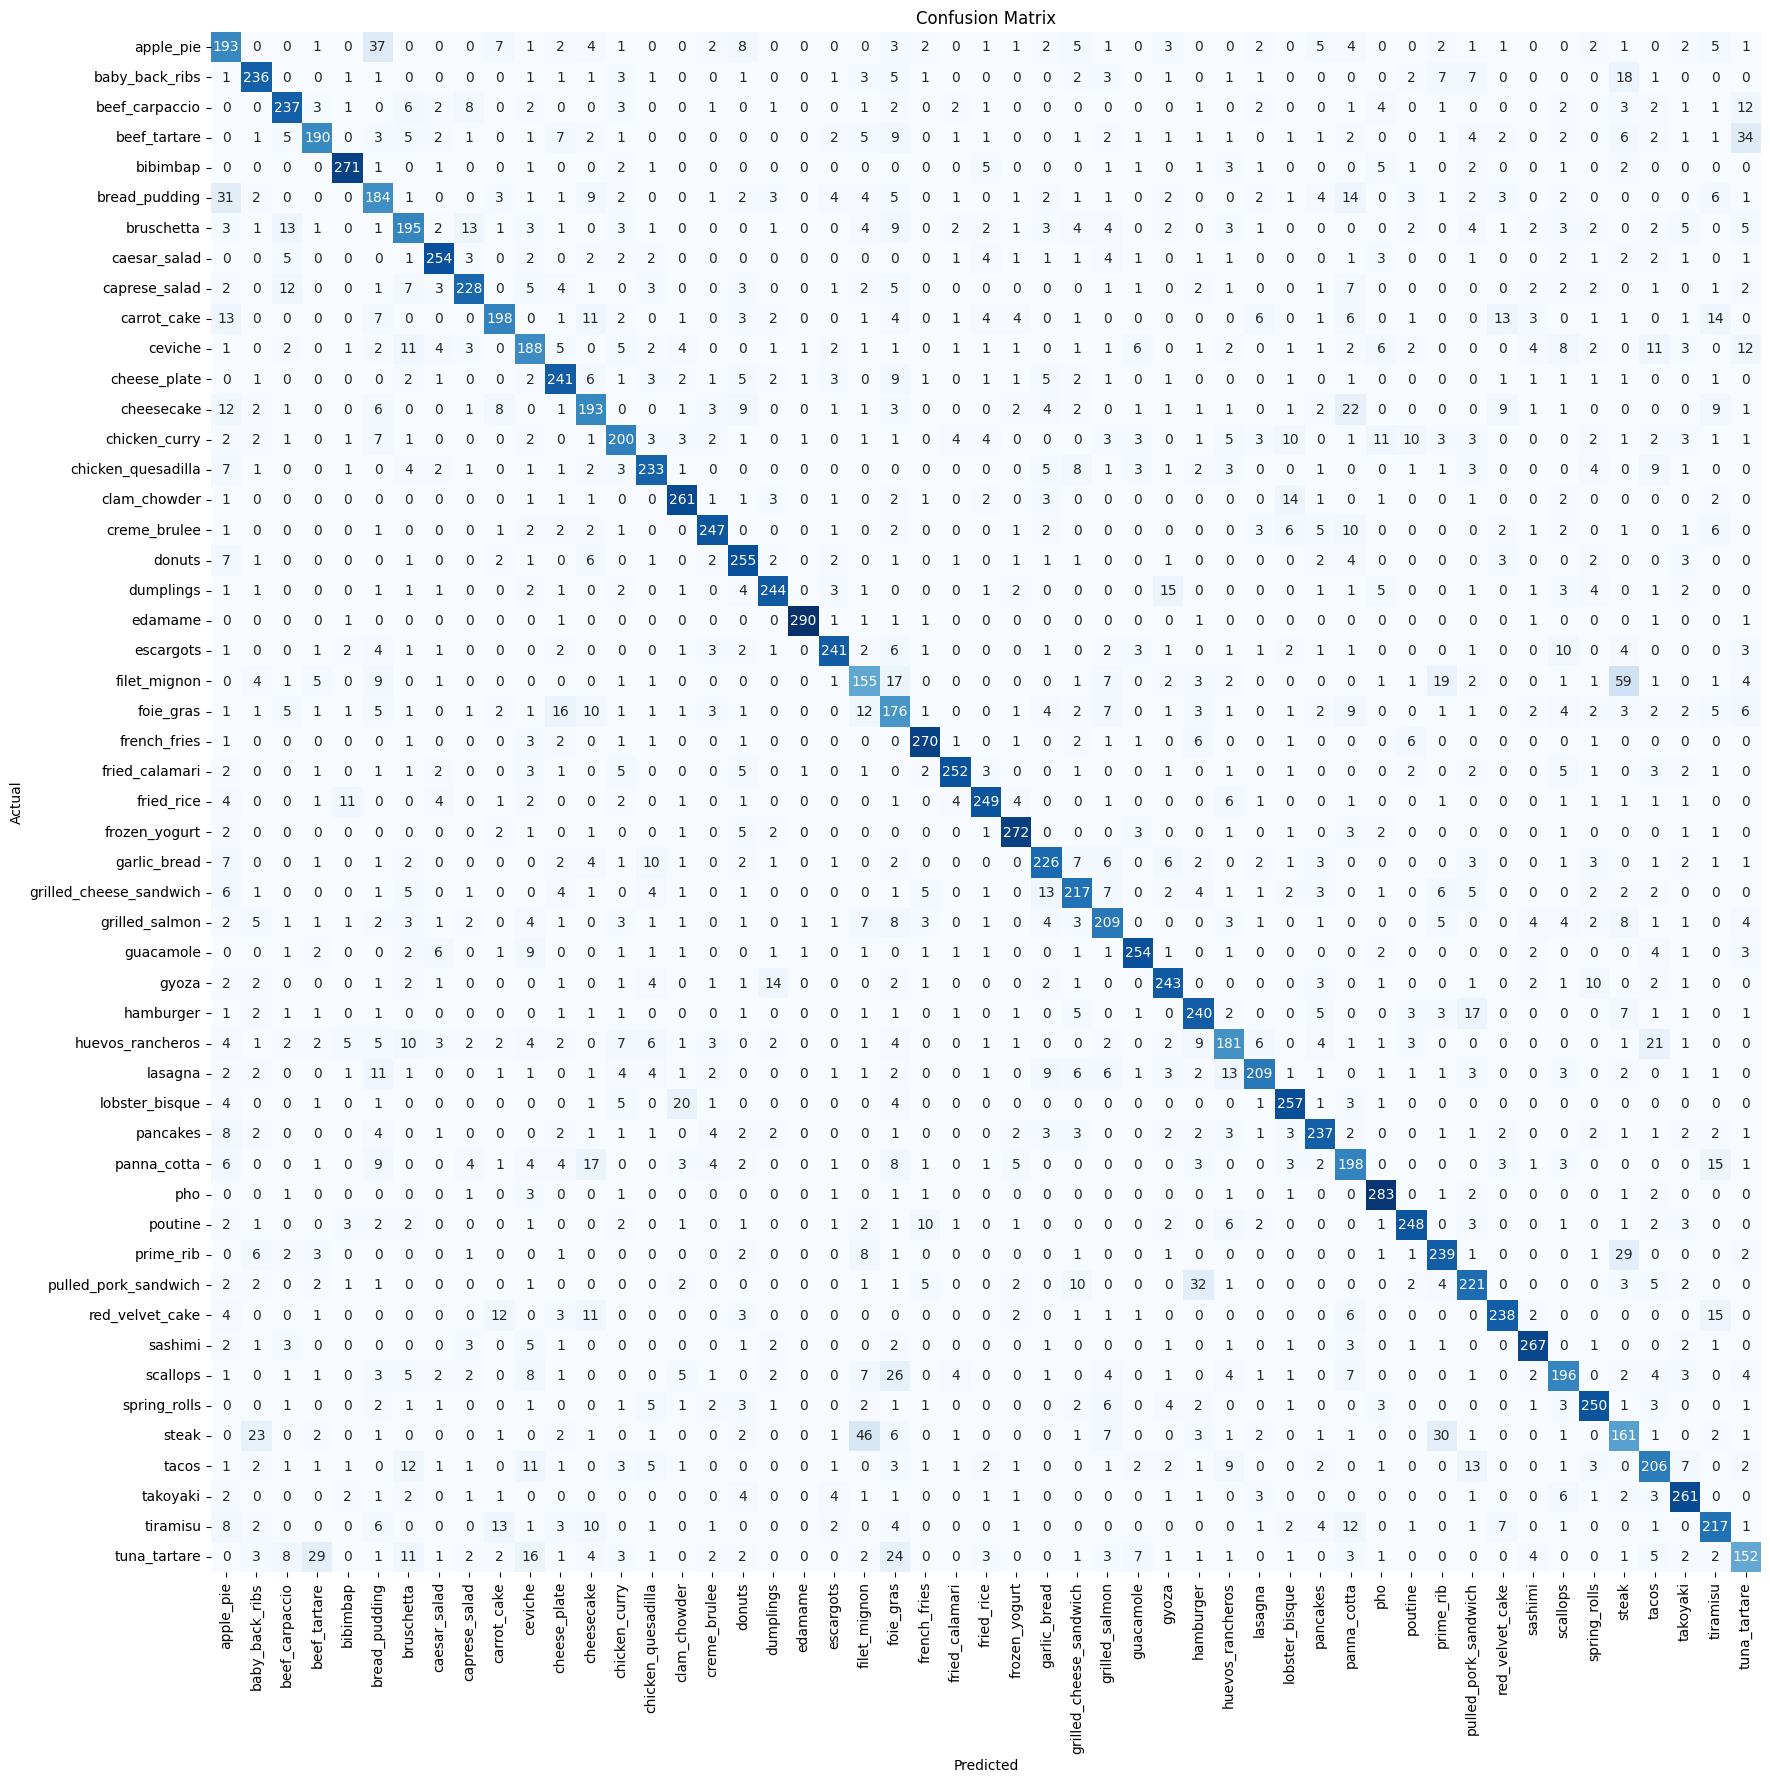

In [82]:

predictions = np.argmax(class_probs, axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(51) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(51) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [111]:
y_test = test_images.labels

top1 = 0.0
top3 = 0.0
class_probs = net50_2.predict(test_images)

for i, l in enumerate(test_images.labels):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:3]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top3 += 1.0

print("top1 acc", top1/len(test_images.labels))
print("top3 acc", top3/len(test_images.labels))

479/479 [==============================] - 36s 76ms/step
top1 acc 0.772483660130719
top3 acc 0.9017647058823529


In [83]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                          precision    recall  f1-score   support

              apple_pie       0.55      0.64      0.59       300
         baby_back_ribs       0.77      0.79      0.78       300
         beef_carpaccio       0.78      0.79      0.78       300
           beef_tartare       0.75      0.63      0.69       300
               bibimbap       0.89      0.90      0.90       300
          bread_pudding       0.57      0.61      0.59       300
             bruschetta       0.66      0.65      0.65       300
           caesar_salad       0.86      0.85      0.85       300
          caprese_salad       0.82      0.76      0.79       300
            carrot_cake       0.76      0.66      0.71       300
                ceviche       0.64      0.63      0.63       300
           cheese_plate       0.75      0.80      0.78       300
             cheesecake       0.63      0.64      0.64       300
          chicken_curry       0.73      0.

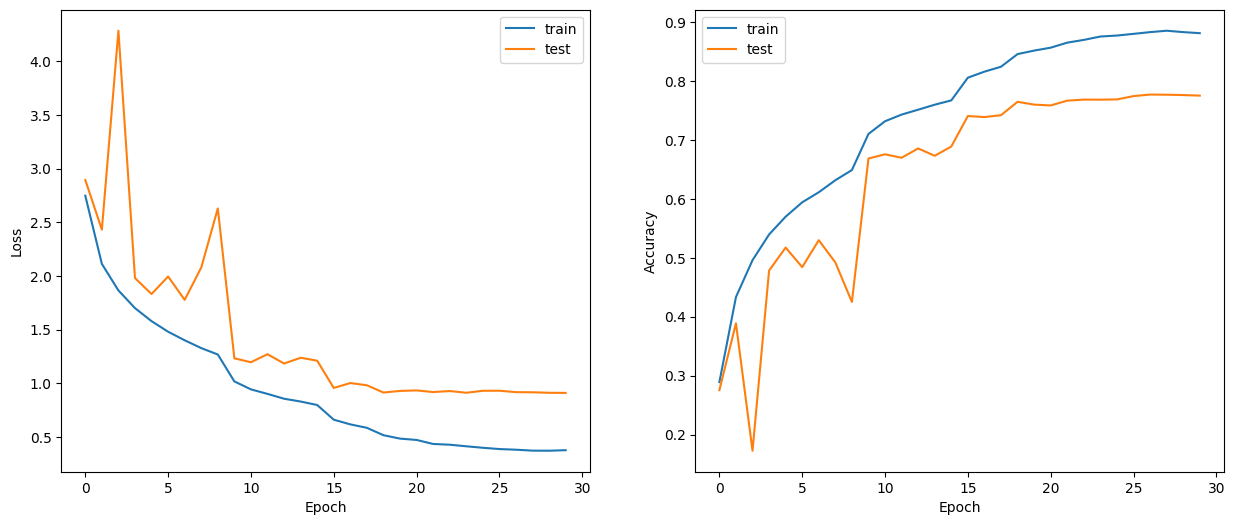

In [80]:

# Visualization of the learning curves
# Loss
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])


In [34]:

net = None
net50_2 = keras.models.load_model('new2_inception_50.h5')

In [35]:
y_test = test_images.labels

top1 = 0.0
top3 = 0.0
class_probs = net50_2.predict(test_images)

for i, l in enumerate(test_images.labels):
    class_prob = class_probs[i]
    top_values = (-class_prob).argsort()[:3]
    if top_values[0] == l:
        top1 += 1.0
    if np.isin(np.array([l]), top_values):
        top3 += 1.0

print("top1 acc", top1/len(test_images.labels))
print("top3 acc", top3/len(test_images.labels))

479/479 [==============================] - 38s 76ms/step
top1 acc 0.5298692810457516
top3 acc 0.7341176470588235


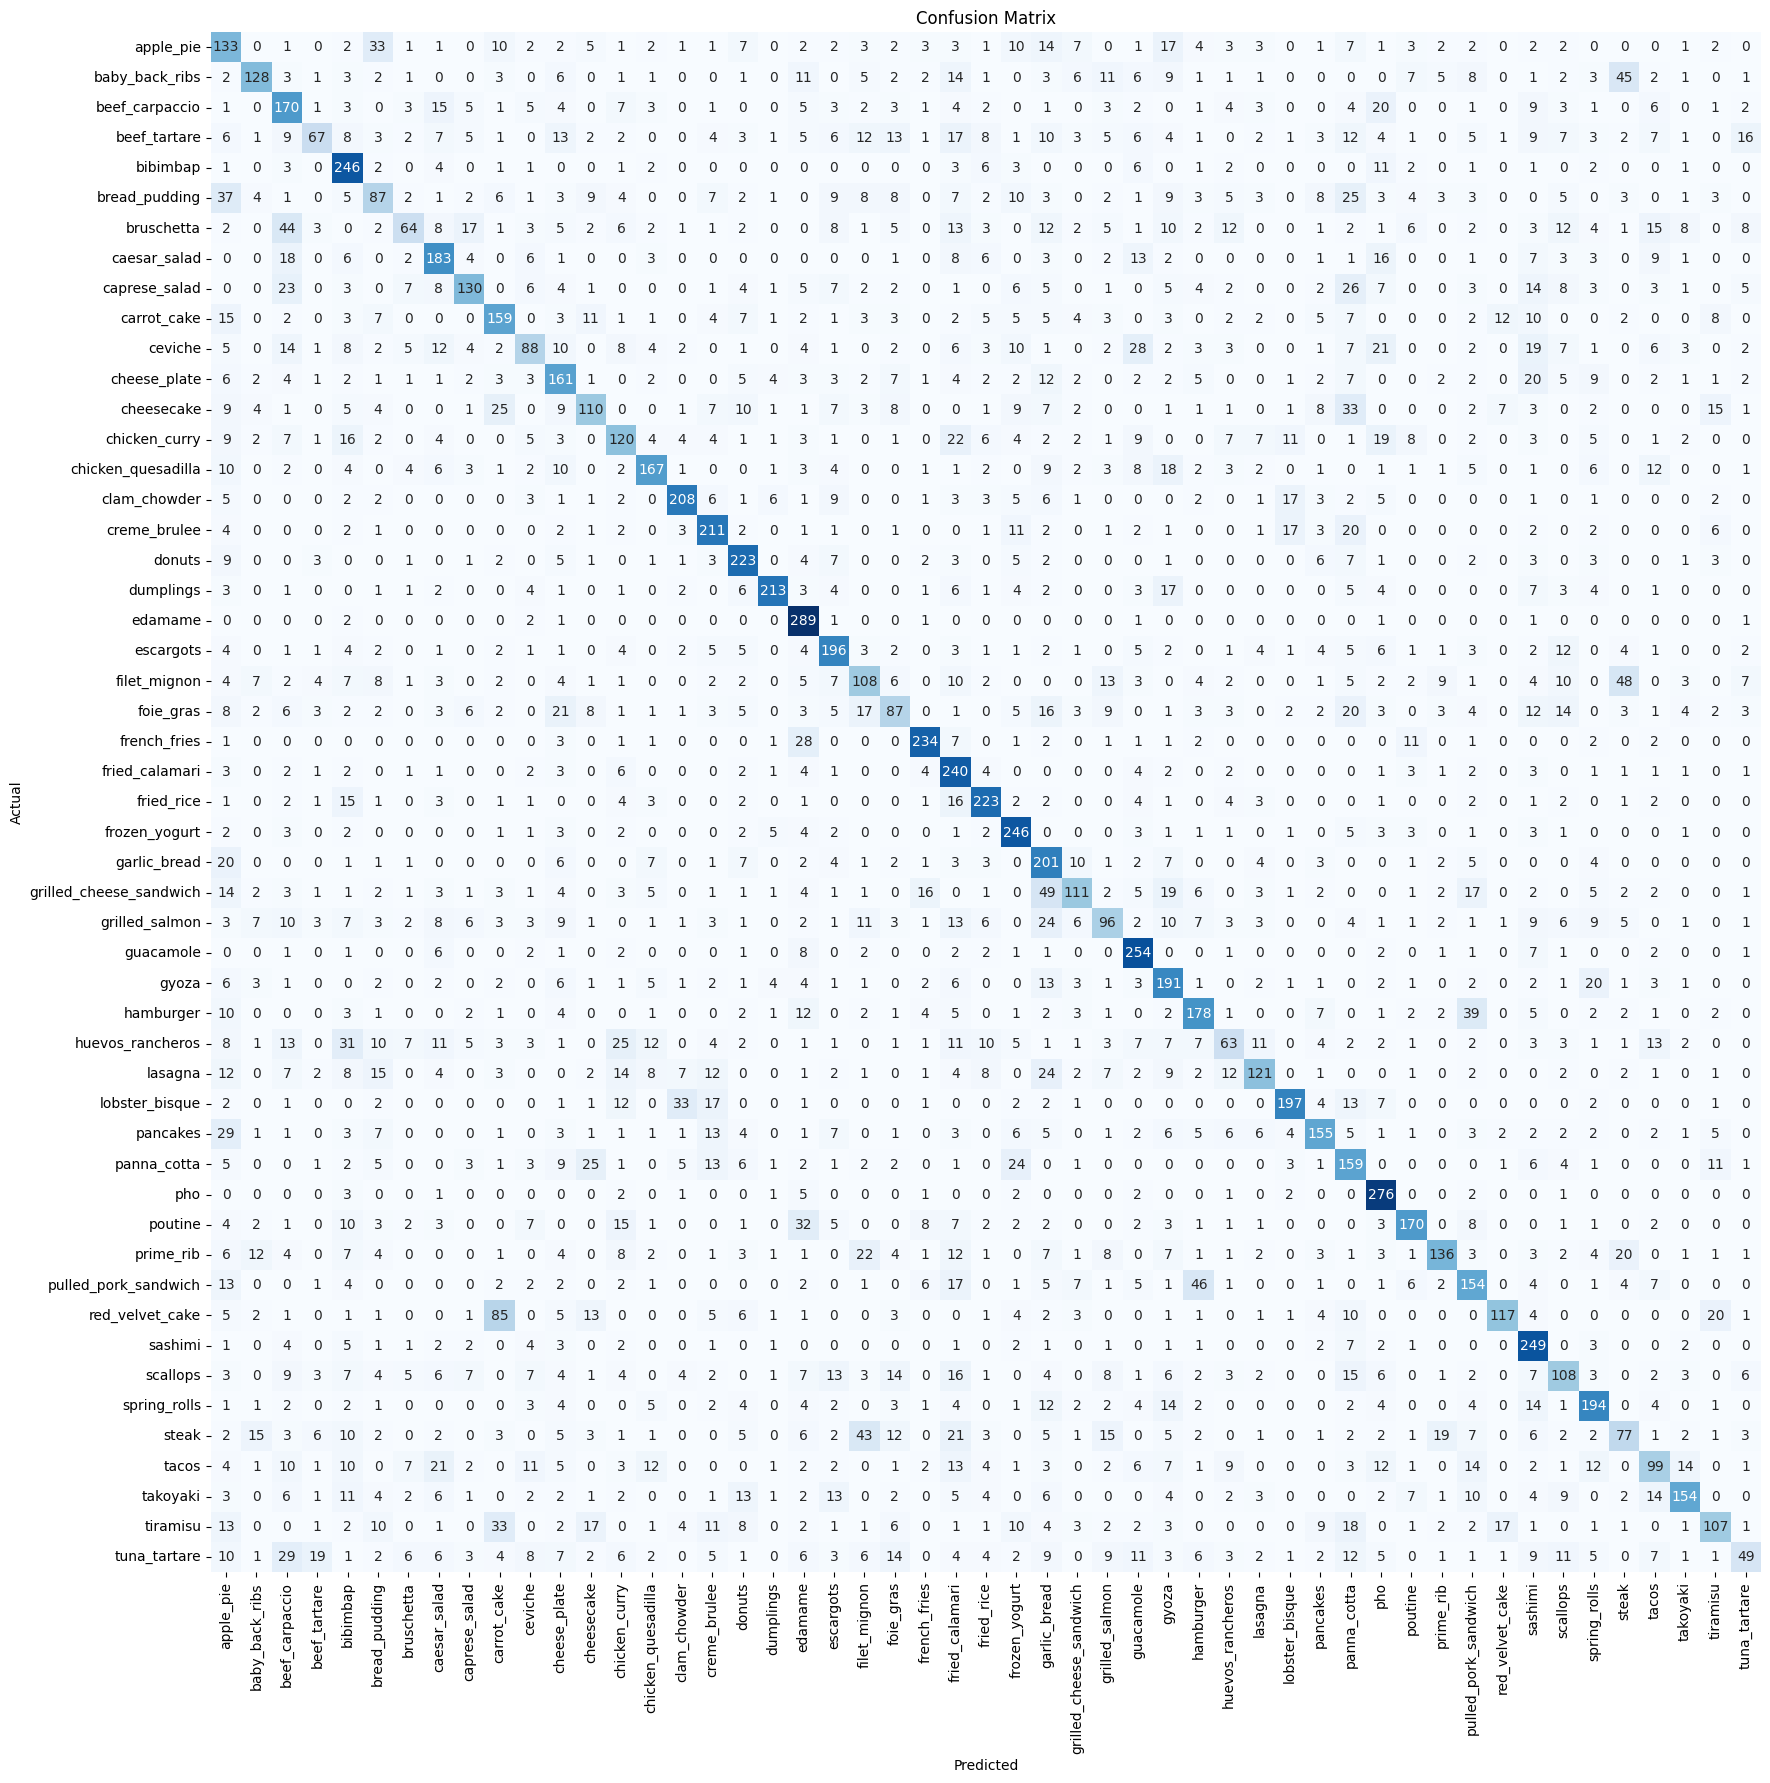

In [38]:

predictions = np.argmax(class_probs, axis=1)

cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(51) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(51) + 0.5, labels=test_images.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                          precision    recall  f1-score   support

              apple_pie       0.29      0.44      0.35       300
         baby_back_ribs       0.65      0.43      0.51       300
         beef_carpaccio       0.40      0.57      0.47       300
           beef_tartare       0.53      0.22      0.31       300
               bibimbap       0.51      0.82      0.63       300
          bread_pudding       0.36      0.29      0.32       300
             bruschetta       0.49      0.21      0.30       300
           caesar_salad       0.53      0.61      0.57       300
          caprese_salad       0.61      0.43      0.51       300
            carrot_cake       0.43      0.53      0.48       300
                ceviche       0.46      0.29      0.36       300
           cheese_plate       0.44      0.54      0.48       300
             cheesecake       0.50      0.37      0.42       300
          chicken_curry       0.43      0.

DEMO

In [95]:

net = None
net50_2 = keras.models.load_model('/content/new2_inception_51.keras')

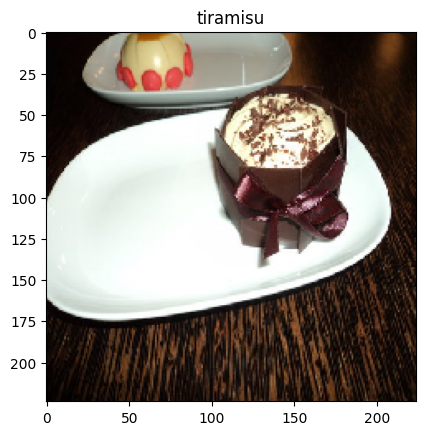

In [97]:

i = 11258
img = kimage.load_img(test_df.Filepath.iloc[i], target_size=(224, 224))

plt.imshow(img)
plt.title(test_df.Label.iloc[i])
plt.show()

In [98]:

labels = list(set(strain.Label))

In [112]:

def demo(i):
  img = kimage.load_img(stest.Filepath.iloc[i], target_size=(224, 224))
  plt.imshow(img)
  plt.title(stest.Label.iloc[i])
  plt.show()

  x = kimage.img_to_array(img)
  x = x.astype('float32')
  x /=255.0
  x = np.expand_dims(x, axis=0)
  yc_pred = net50_2.predict(x)

  m, n = yc_pred.shape
  file_names = labels
  indices = np.argpartition(-yc_pred, 3, axis=1)[:, :3]
  probs = np.sort(-yc_pred, axis=1)[:, :3]
  df = pd.DataFrame({'Index': indices.flatten(), 'Probability': -probs.flatten()})
  df['File Name'] = [file_names[index] for index in indices.flatten()]
  df.columns = ['Index', 'Probability', 'Label']
  return df

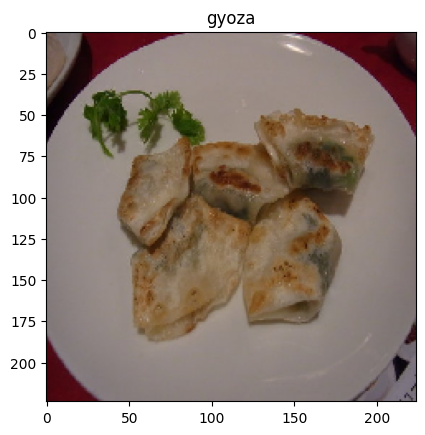

1/1 [==============================] - 0s 24ms/step


Index  Probability         Label
0     31     0.879218         gyoza
1     27     0.035116  cheese_plate
2     18     0.031609  filet_mignon

In [110]:

i = random.randint(0,15000)
demo(i)